In [1]:
from utils.analyze.munsell_analyze import MunsellEmbeddingsAnalyzer
import pandas as  pd
import numpy as np

In [2]:
analyzer = MunsellEmbeddingsAnalyzer('data/embeddings/qwen2.5_7B/describe_color_musell_2.0', 'data/colors/munsell_colors_2.0/munsell_manifest_2.0.csv')

In [3]:
analyzer3 = MunsellEmbeddingsAnalyzer('data/embeddings/qwen2.5_7B/munsell_colors_describe', 'data/colors/munsell_colors/munsell_manifest.csv')

In [4]:
pd.DataFrame(analyzer.chain_loader.get_all_available_colors())

,csv_index,H,C,V,xyY,RGB,munsell_spec,embedding_index
0,1,2.5R,4,1,"(0.4166, 0.2569, 1.21)","(0.21305455763891412, 0.05419276386811935, 0.1...",2.5R 1/4,1
1,2,2.5R,6,1,"(0.4515, 0.2329, 1.21)","(0.24587297650665718, 0.008399149818978102, 0....",2.5R 1/6,2
2,3,2.5R,2,2,"(0.3614, 0.3033, 3.126)","(0.26107440978069263, 0.16794833571627193, 0.1...",2.5R 2/2,3
3,4,2.5R,4,2,"(0.4021, 0.29, 3.126)","(0.30523565813516695, 0.14291381164973918, 0.1...",2.5R 2/4,4
4,5,2.5R,6,2,"(0.439, 0.276, 3.126)","(0.3440589819610976, 0.110920245374517, 0.1914...",2.5R 2/6,5
...,...,...,...,...,...,...,...,...
1487,1488,N,0,5,"(0.31, 0.316, 19.7)","(0.49253392500669396, 0.47538329584345734, 0.5...",N 5/0,1488
1488,1489,N,0,6,"(0.31, 0.316, 30.0)","(0.5974050213067861, 0.5769694718848406, 0.610...",N 6/0,1489
1489,1490,N,0,7,"(0.31, 0.316, 43.0)","(0.702987357365458, 0.6792446092308329, 0.7177...",N 7/0,1490
1490,1491,N,0,8,"(0.31, 0.316, 59.1)","(0.8103893692676774, 0.7832824239693825, 0.827...",N 8/0,1491


In [6]:
import numpy as np
np.max(np.array(d['xyY'].to_numpy().tolist())[:, 2])

78.659999999999997

In [36]:
matrix, rgb_arr = analyzer.calculate_list_distances_matrix(
    variables=['c'],
    values=[[0,2,4,6,8, 10]],
    fixed_h=['2.5R'],
    fixed_c=[None],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5],
    return_rgb=True
    )

In [71]:
matrix, rgb_arr = analyzer.calculate_list_distances_matrix(
    variables=['c'],
    values=[None],
    fixed_h=['2.5R'],
    fixed_c=[None],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5],
    return_rgb=True
    )

In [38]:
matrix[0].keys()

dict_keys(['srgb', 'vl_cosine', 'lm_cosine', 'cam', 'munsell', 'chain_info'])

In [4]:
analyzer.chain_loader.get_chain_by_specification(variable='c', values=[0, 2], fixed_h='5R',fixed_v=5)

{'lm_pooled': array([[ 4.78125   ,  7.15625   ,  2.        , ..., -3.75      ,
         -0.08056641,  1.625     ],
        [ 3.0625    ,  6.59375   , -0.5859375 , ..., -2.1875    ,
         -0.9296875 ,  1.4375    ]], dtype=float32),
 'vl_pooled': array([[-2.71875   ,  0.13671875,  0.26953125, ..., -1.3515625 ,
          0.24511719, -0.87109375],
        [-2.796875  ,  0.14160156,  0.1640625 , ..., -1.453125  ,
          0.44140625, -0.8984375 ]], dtype=float32),
 'metadata': [{'munsell_color': H=5R, C=0, V=5,
   'xyY': (0.31, 0.316, 19.7),
   'RGB': (0.49253392500669396, 0.47538329584345734, 0.5032105352401055),
   'H': 'N',
   'C': 0,
   'V': 5,
   'csv_index': 1489,
   'has_embedding': True},
  {'munsell_color': H=5R, C=2, V=5,
   'xyY': (0.3392, 0.3192, 19.77),
   'RGB': (0.5577250018865261, 0.4566314413452643, 0.4788726465766931),
   'H': '5.0R',
   'C': 2,
   'V': 5,
   'csv_index': 61,
   'has_embedding': True}]}

In [5]:
analyzer.chain_loader.get_chain_by_specification(variable='c', values=[0, 2], fixed_h='5R',fixed_v=5)

{'lm_pooled': array([[ 4.78125   ,  7.15625   ,  2.        , ..., -3.75      ,
         -0.08056641,  1.625     ],
        [ 3.0625    ,  6.59375   , -0.5859375 , ..., -2.1875    ,
         -0.9296875 ,  1.4375    ]], dtype=float32),
 'vl_pooled': array([[-2.71875   ,  0.13671875,  0.26953125, ..., -1.3515625 ,
          0.24511719, -0.87109375],
        [-2.796875  ,  0.14160156,  0.1640625 , ..., -1.453125  ,
          0.44140625, -0.8984375 ]], dtype=float32),
 'metadata': [{'munsell_color': H=5R, C=0, V=5,
   'xyY': (0.31, 0.316, 19.7),
   'RGB': (0.49253392500669396, 0.47538329584345734, 0.5032105352401055),
   'H': 'N',
   'C': 0,
   'V': 5,
   'csv_index': 1489,
   'has_embedding': True},
  {'munsell_color': H=5R, C=2, V=5,
   'xyY': (0.3392, 0.3192, 19.77),
   'RGB': (0.5577250018865261, 0.4566314413452643, 0.4788726465766931),
   'H': '5.0R',
   'C': 2,
   'V': 5,
   'csv_index': 61,
   'has_embedding': True}]}

In [6]:
analyzer3.chain_loader.get_chain_by_specification(variable='c', values=[0, 2], fixed_h='5R',fixed_v=5)

{'lm_pooled': array([[ 4.78125   ,  7.15625   ,  2.        , ..., -3.75      ,
         -0.08056641,  1.625     ],
        [ 2.953125  ,  6.59375   , -0.90625   , ..., -1.8671875 ,
         -0.796875  ,  1.390625  ]], dtype=float32),
 'vl_pooled': array([[-2.71875   ,  0.13671875,  0.26953125, ..., -1.3515625 ,
          0.24511719, -0.87109375],
        [-2.8125    ,  0.15527344,  0.15234375, ..., -1.4609375 ,
          0.46289062, -0.8984375 ]], dtype=float32),
 'metadata': [{'munsell_color': H=5R, C=0, V=5,
   'xyY': (0.31, 0.316, 19.7),
   'RGB': (0.49253392500669396, 0.47538329584345734, 0.5032105352401055),
   'H': '2.5R',
   'C': 0,
   'V': 5,
   'csv_index': 23,
   'has_embedding': True},
  {'munsell_color': H=5R, C=2, V=5,
   'xyY': (0.341, 0.315, 18.3),
   'RGB': (0.5478433759175081, 0.43614198349952604, 0.46721577598117886),
   'H': '5.0R',
   'C': 2,
   'V': 5,
   'csv_index': 72,
   'has_embedding': True}]}

In [8]:
matrix, rgb = analyzer.calculate_list_distances_matrix(
    variables=['c'] * 5,
    values=[[0, 2,4,6,8], [0, 2,4,6,8], [0, 2,4,6,8,10,12,14], [0, 2,4,6,8,10,12,14], [0, 2,4, 6]],
    fixed_h=['5Y', '5G', '2.5R', '5P', '5B'],
    fixed_c=[None] * 5,      # <-- fixed chroma for the first, None for the second
    fixed_v=[5] * 5,
    return_rgb=True
    )

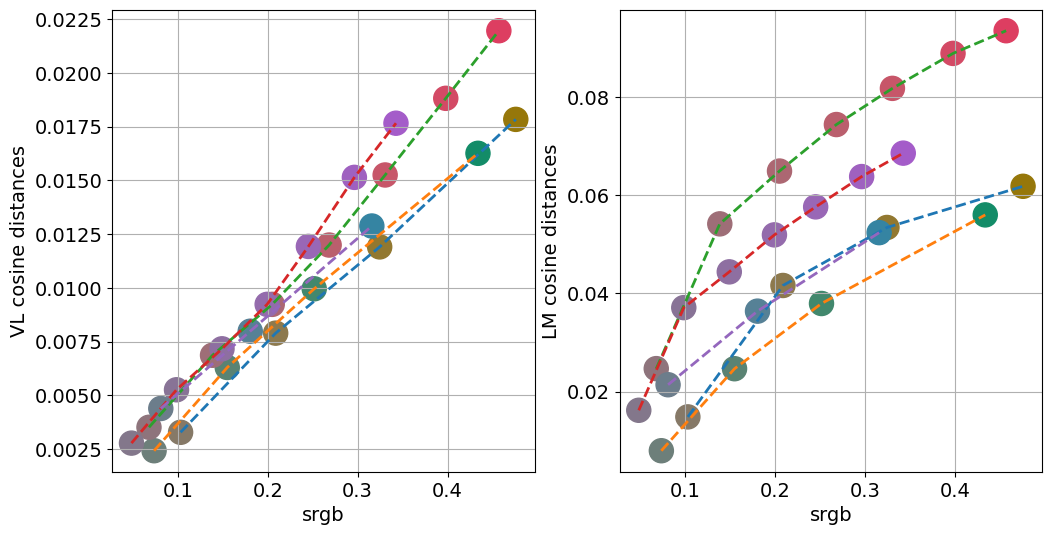

(<Figure size 1200x600 with 2 Axes>,
 (<Axes: xlabel='srgb', ylabel='VL cosine distances'>,
  <Axes: xlabel='srgb', ylabel='LM cosine distances'>))

In [9]:
analyzer.plot_list_distances_maxtrix_result(matrix, 0, 'srgb', rgb)

In [10]:
matrix, rgb = analyzer3.calculate_list_distances_matrix(
    variables=['c'] * 5,
    values=[[0, 2,4,6,8], [0, 2,4,6,8], [0, 2,4,6,8,10,12,14], [0, 2,4,6,8,10,12,14], [0, 2,4, 6]],
    fixed_h=['5Y', '5G', '2.5R', '5P', '5B'],
    fixed_c=[None] * 5,      # <-- fixed chroma for the first, None for the second
    fixed_v=[5] * 5,
    return_rgb=True
    )

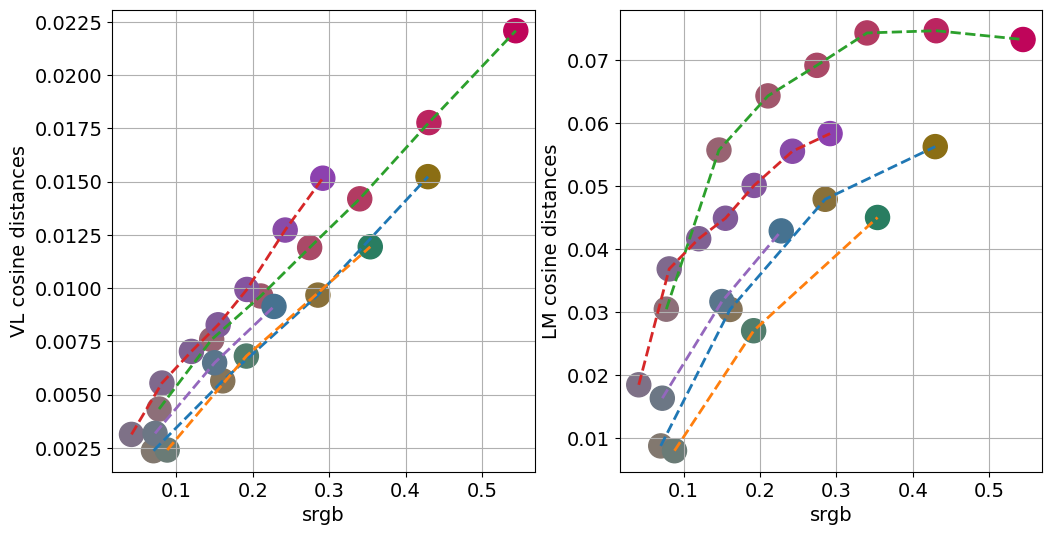

(<Figure size 1200x600 with 2 Axes>,
 (<Axes: xlabel='srgb', ylabel='VL cosine distances'>,
  <Axes: xlabel='srgb', ylabel='LM cosine distances'>))

In [11]:
analyzer.plot_list_distances_maxtrix_result(matrix, 0, 'srgb', rgb)

# Varying chroma

# 10R, V=5

In [14]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='10R', fixed_v=5, fixed_c=None, return_rgb=True)

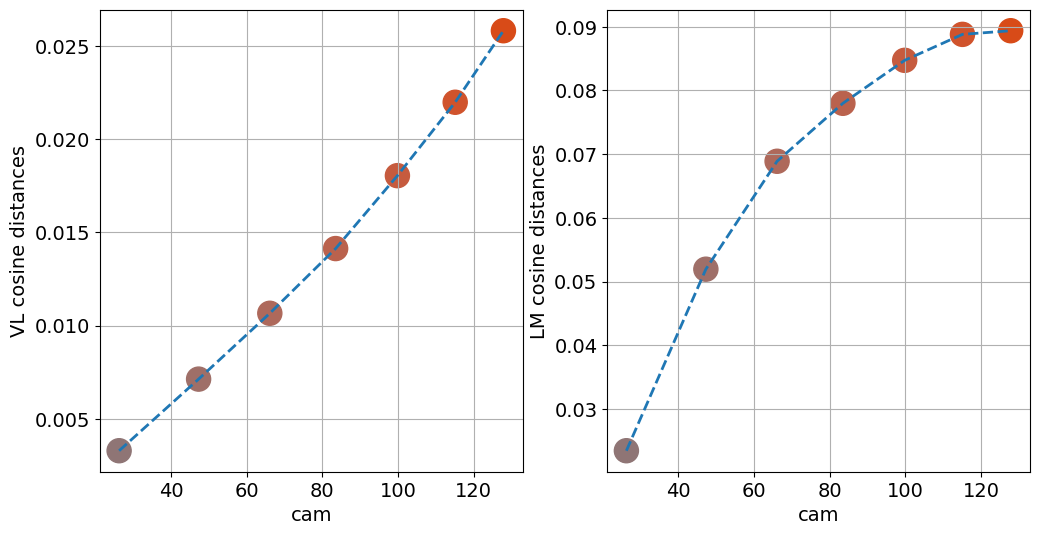

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 10R / Value: 5 / Varying: c'}>)

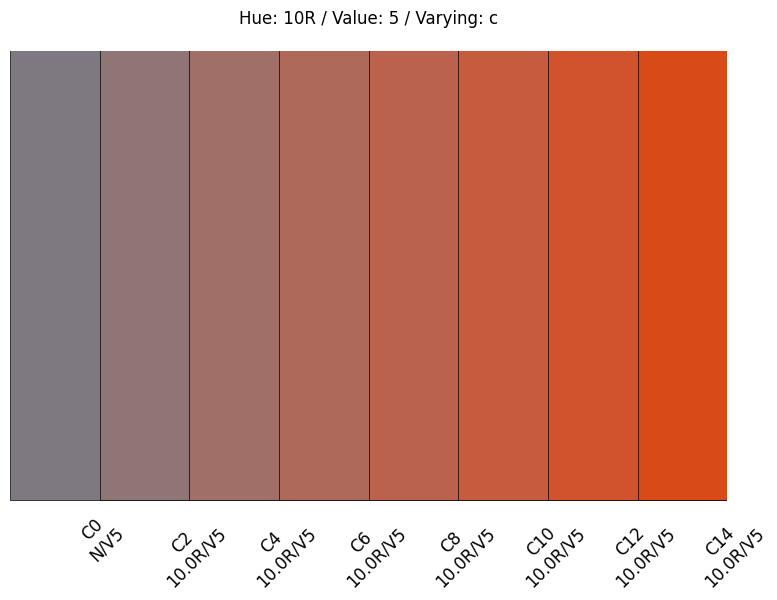

In [15]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='10R', fixed_v=5, fixed_c=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='cam', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('c', None, fixed_h='10R', fixed_v=5, fixed_c=None)

# 5R, V=5

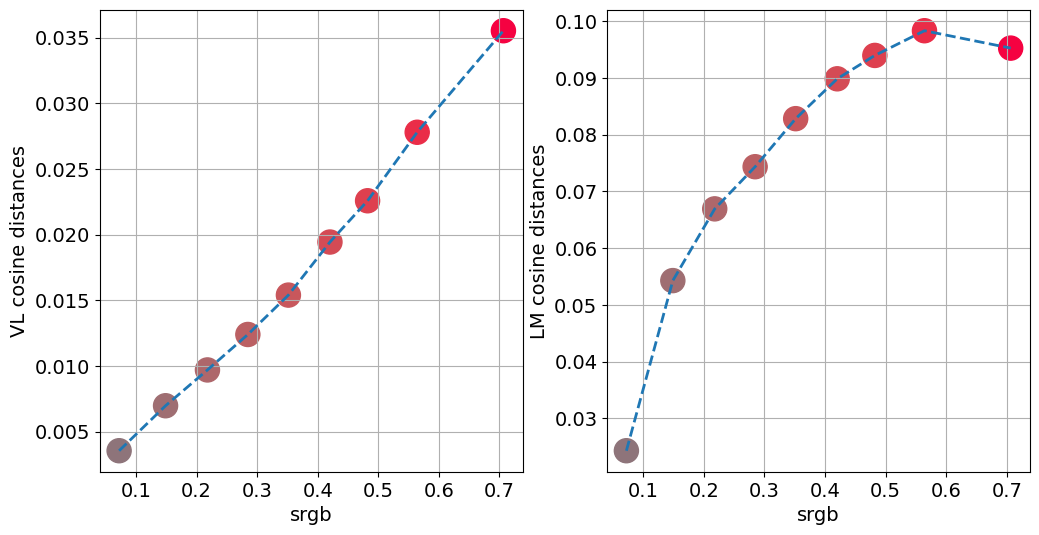

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 5R / Value: 5 / Varying: c'}>)

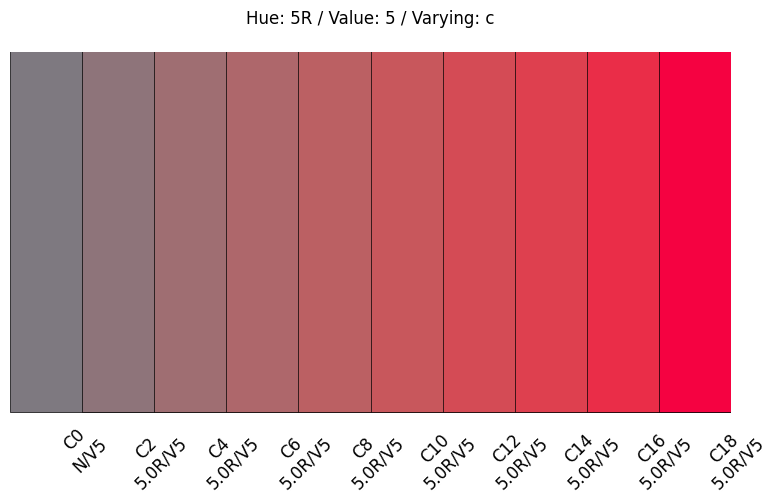

In [16]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='5R', fixed_v=5, fixed_c=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='srgb', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('c', None, fixed_h='5R', fixed_v=5, fixed_c=None)

# 2.5R, V=5

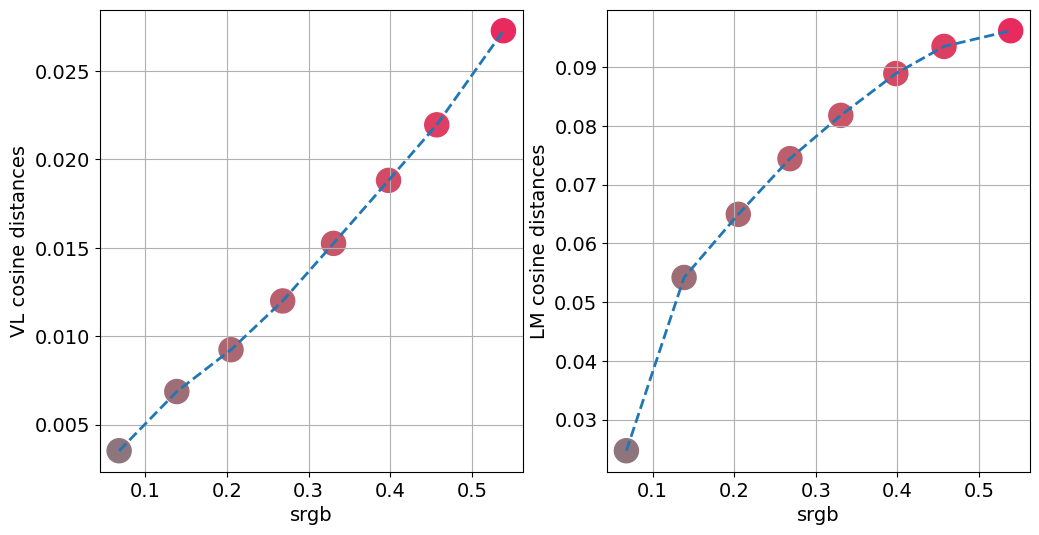

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5R / Value: 5 / Varying: c'}>)

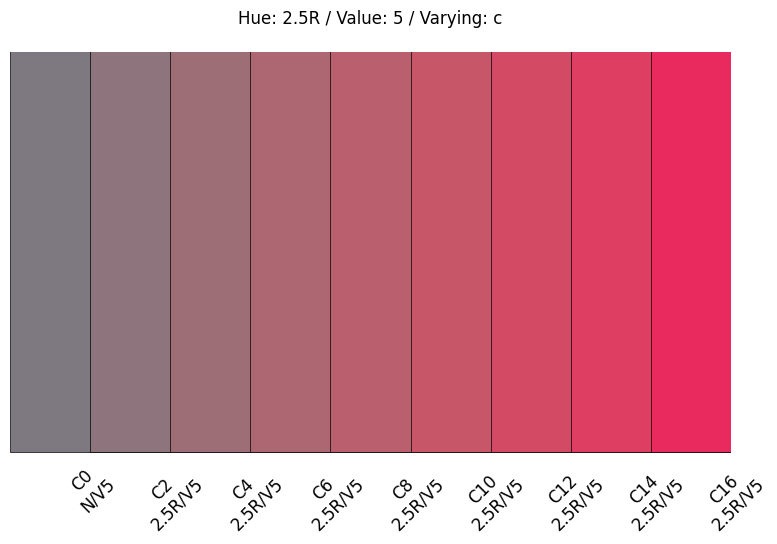

In [17]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='2.5R', fixed_v=5, fixed_c=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='srgb', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('c', None, fixed_h='2.5R', fixed_v=5, fixed_c=None)

# 2.5 G =9

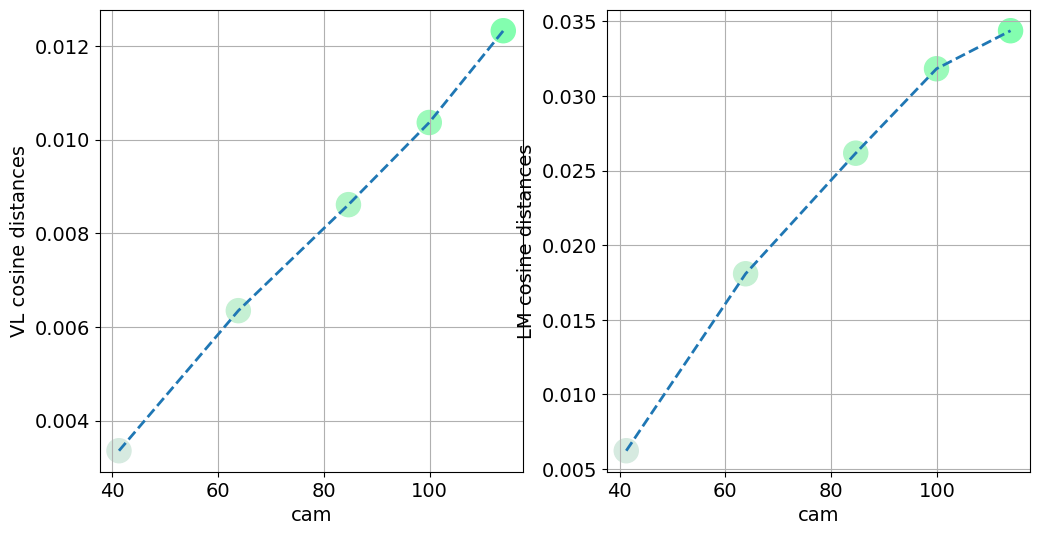

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5G / Value: 9 / Varying: c'}>)

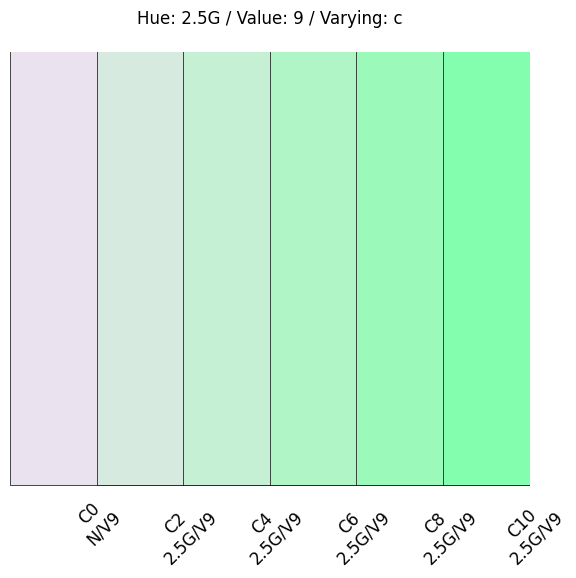

In [18]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='2.5G', fixed_v=9, fixed_c=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='cam', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('c', None, fixed_h='2.5G', fixed_v=9, fixed_c=None)

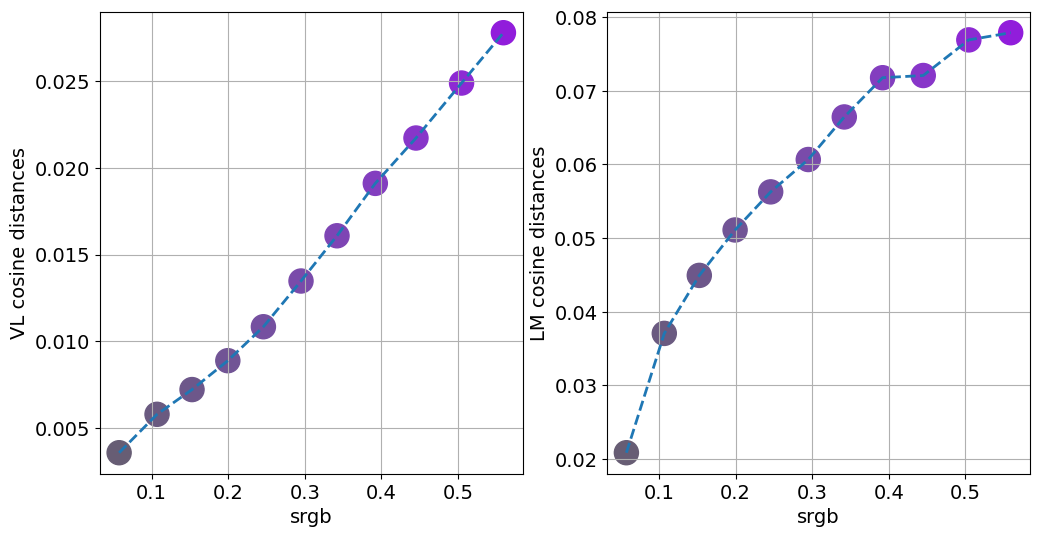

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5P / Value: 4 / Varying: c'}>)

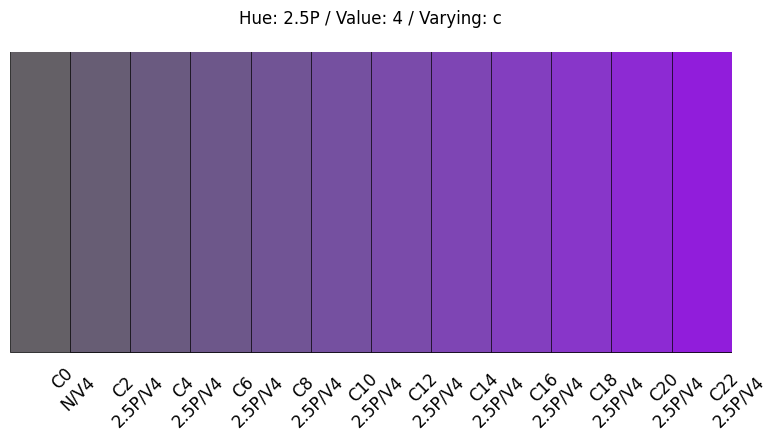

In [19]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='2.5P', fixed_v=4, fixed_c=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='srgb', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('c', None, fixed_h='2.5P', fixed_v=4, fixed_c=None,)

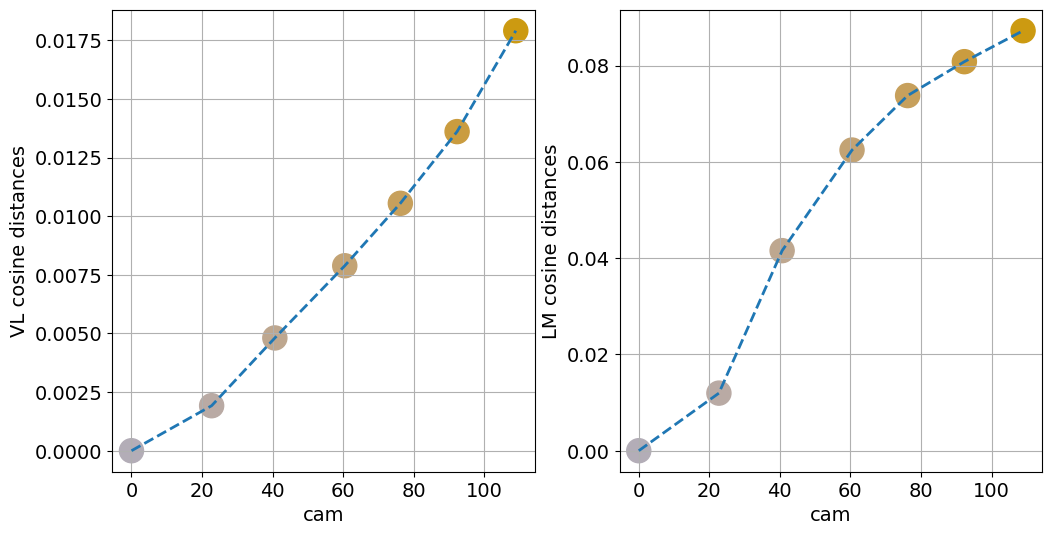

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5Y / Value: 7 / Varying: c'}>)

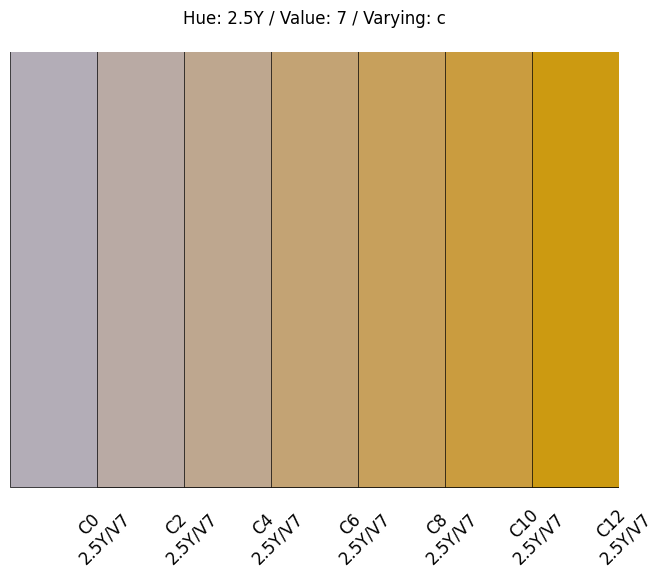

In [22]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('c', None, fixed_h='2.5Y', fixed_v=7, fixed_c=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='cam', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('c', None, fixed_h='2.5Y', fixed_v=7, fixed_c=None,)

# Varying value

# 2.5R C =6

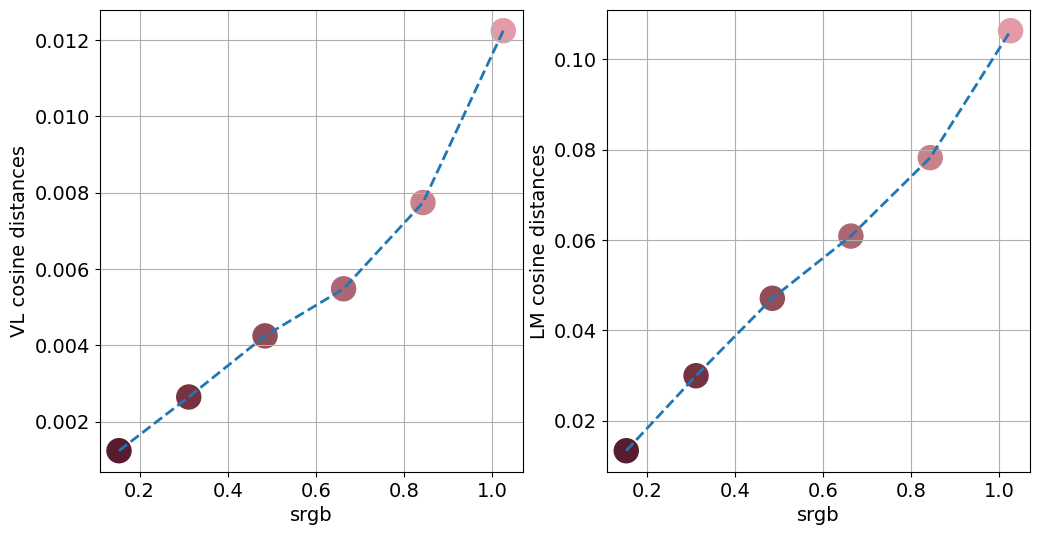

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5R / Chroma: 6 / Varying: v'}>)

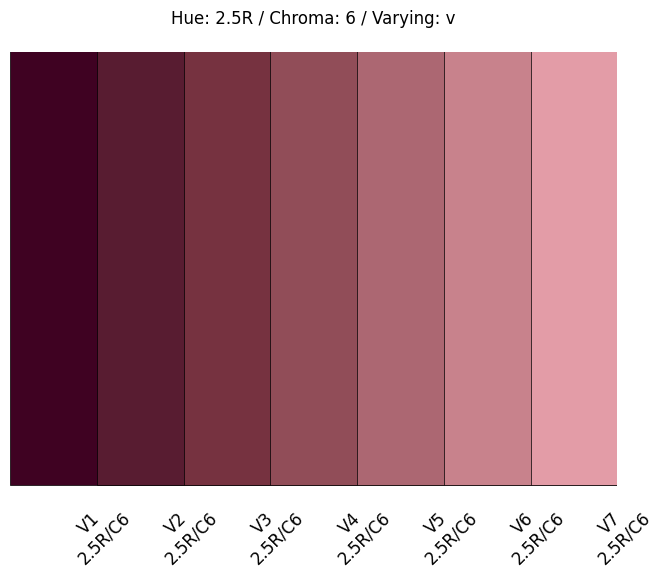

In [20]:
matrix, rgb_arr = analyzer.calculate_distances_matrix('v', None, fixed_h='2.5R', fixed_c=6, fixed_v=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='srgb', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('v', None, fixed_h='2.5R', fixed_c=6, fixed_v=None)

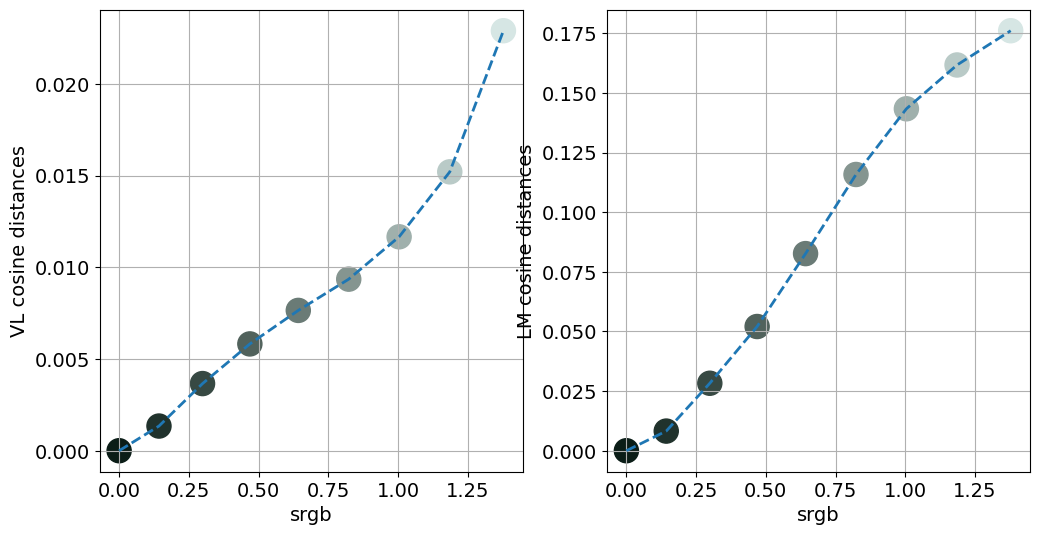

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 5G / Chroma: 2 / Varying: v'}>)

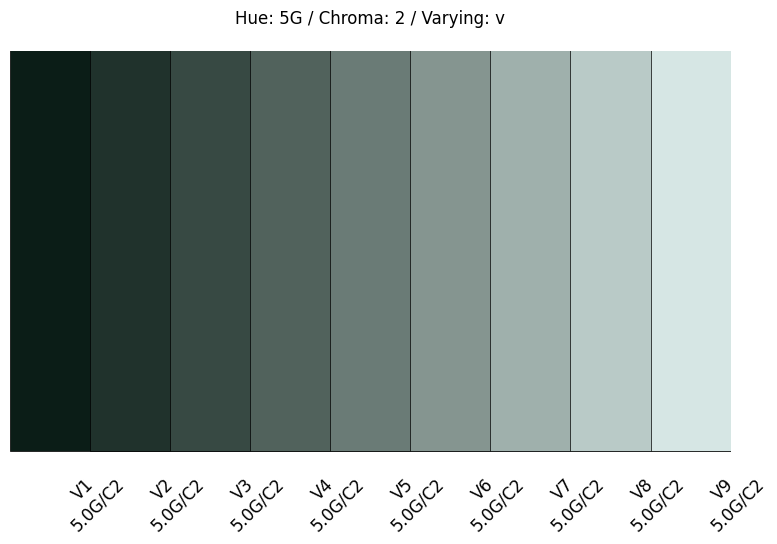

In [24]:
H = '5G'
C = 2
matrix, rgb_arr = analyzer.calculate_distances_matrix('v', None, fixed_h=H, fixed_c=C, fixed_v=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='srgb', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('v', None, fixed_h=H, fixed_c=C, fixed_v=None)

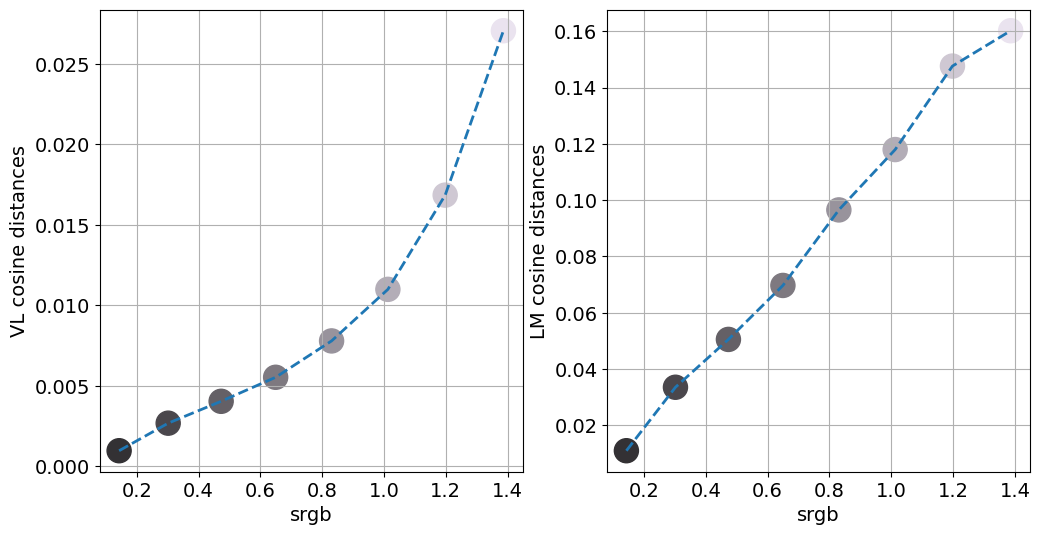

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5Y / Varying: v'}>)

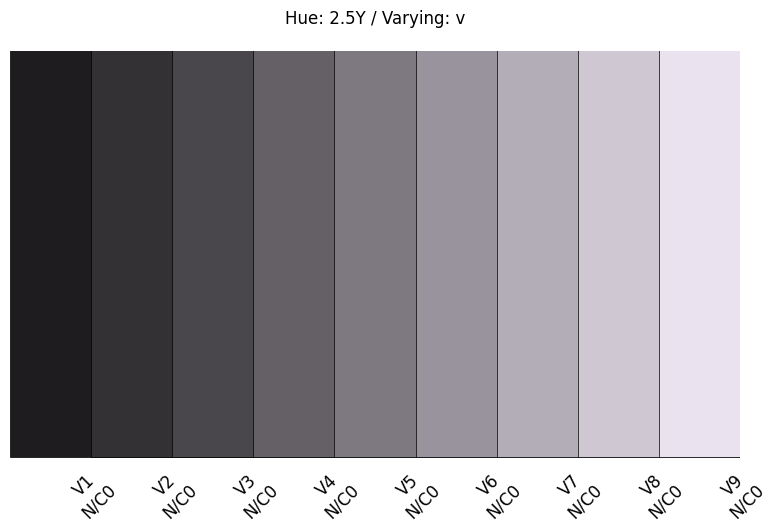

In [21]:
H = '2.5Y'
C = 0
matrix, rgb_arr = analyzer.calculate_distances_matrix('v', None, fixed_h=H, fixed_c=C, fixed_v=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='srgb', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('v', None, fixed_h=H, fixed_c=C, fixed_v=None)

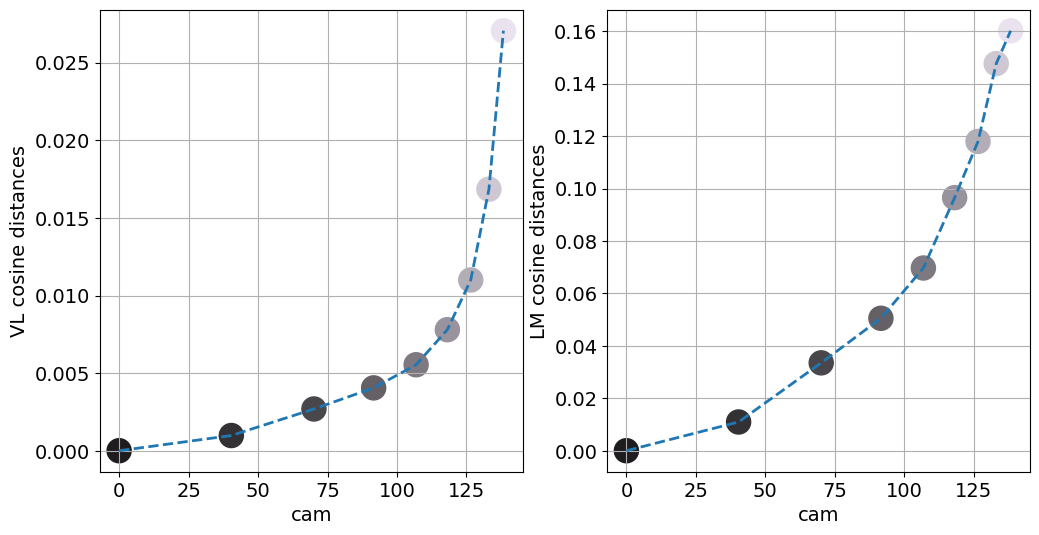

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5Y / Varying: v'}>)

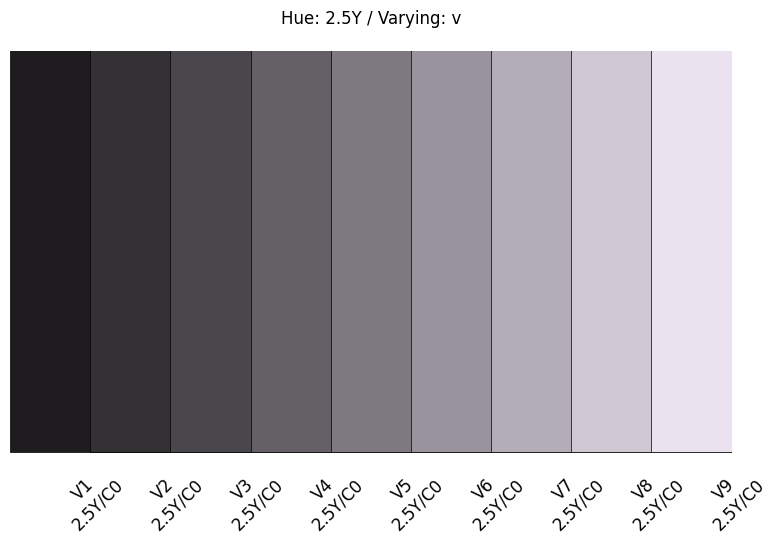

In [26]:
H = '2.5Y'
C = 0
matrix, rgb_arr = analyzer.calculate_distances_matrix('v', None, fixed_h=H, fixed_c=C, fixed_v=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='cam', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('v', None, fixed_h=H, fixed_c=C, fixed_v=None)

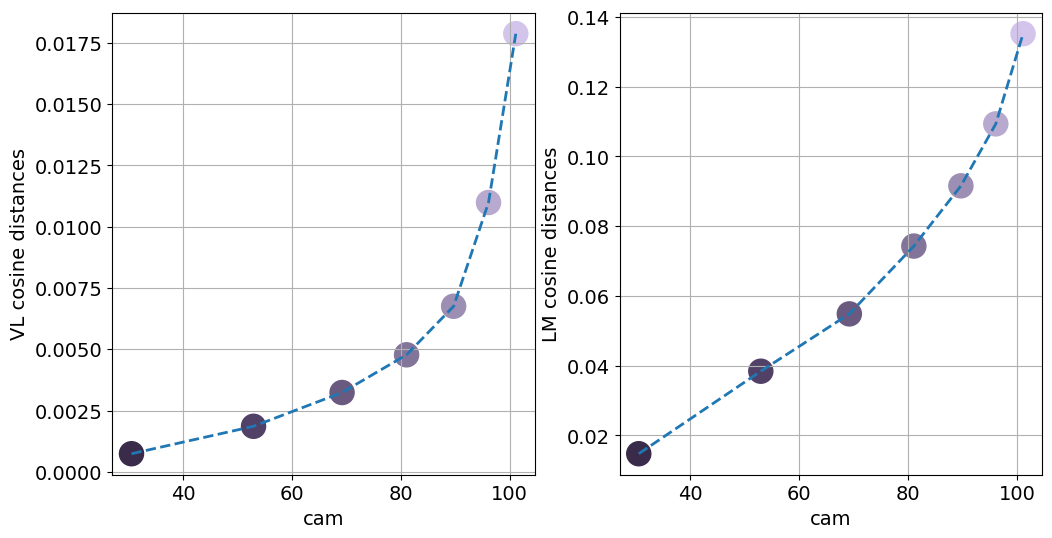

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Hue: 2.5P / Chroma: 4 / Varying: v'}>)

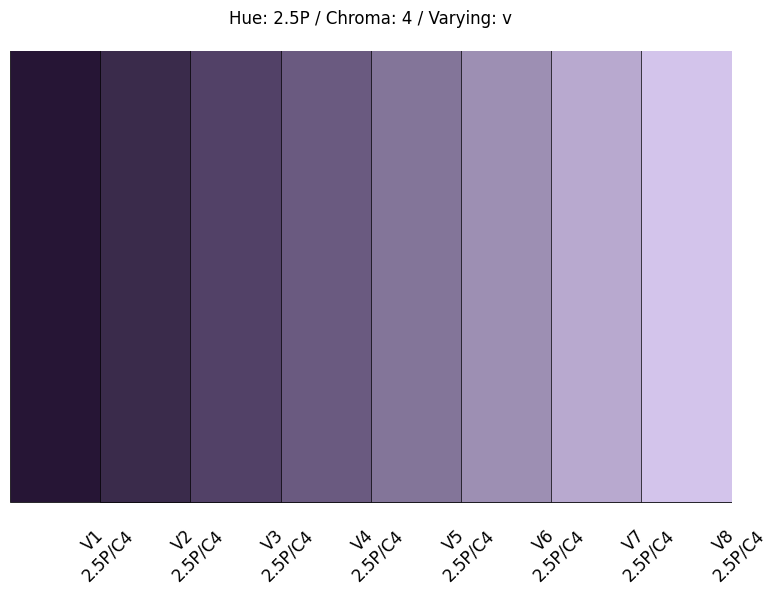

In [22]:
H = '2.5P'
C = 4
matrix, rgb_arr = analyzer.calculate_distances_matrix('v', None, fixed_h=H, fixed_c=C, fixed_v=None, return_rgb=True)
analyzer.plot_distance_matrix_result(matrix, init_idx=0, x='cam', rgb_arr=rgb_arr)
analyzer.draw_munsell_chain('v', None, fixed_h=H, fixed_c=C, fixed_v=None)

# Let's look on PCA of all color
### Maybe we will see the dimension of color space of VLM?

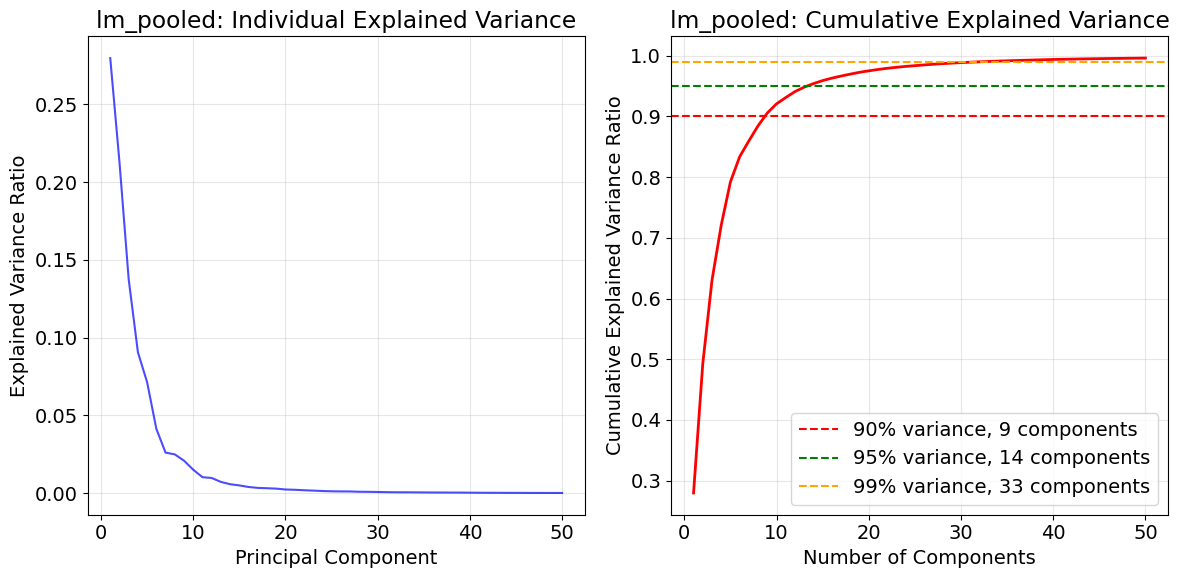

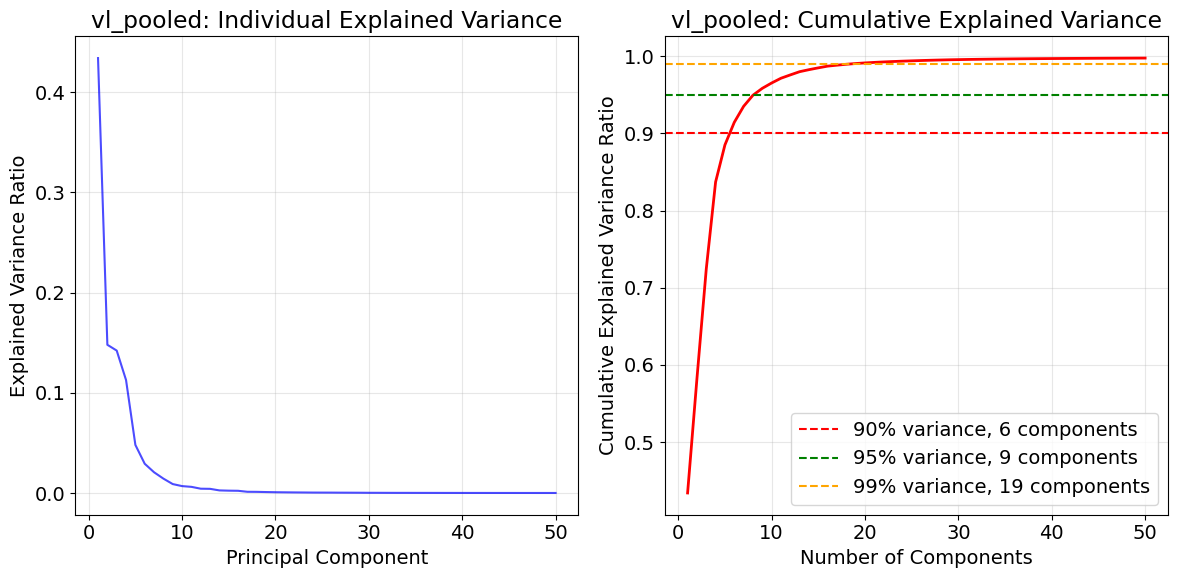

In [28]:
all_embeds = analyzer.chain_loader.get_all_available_embeddings()
pca_result = analyzer.pca_by_embeddings(all_embeds)

analyzer.plot_pca_variance(pca_result, embedding_name='lm_pooled')
analyzer.plot_pca_variance(pca_result, embedding_name='vl_pooled')

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 45.233172
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.631218
[t-SNE] KL divergence after 1600 iterations: 0.096626
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 28 samples in 0.000s...
[t-SNE] Computed neighbors for 28 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 28 / 28
[t-SNE] Mean sigma: 4.282866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.860458
[t-SNE] KL divergence after 1950 iterations: 0.154502


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:263: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


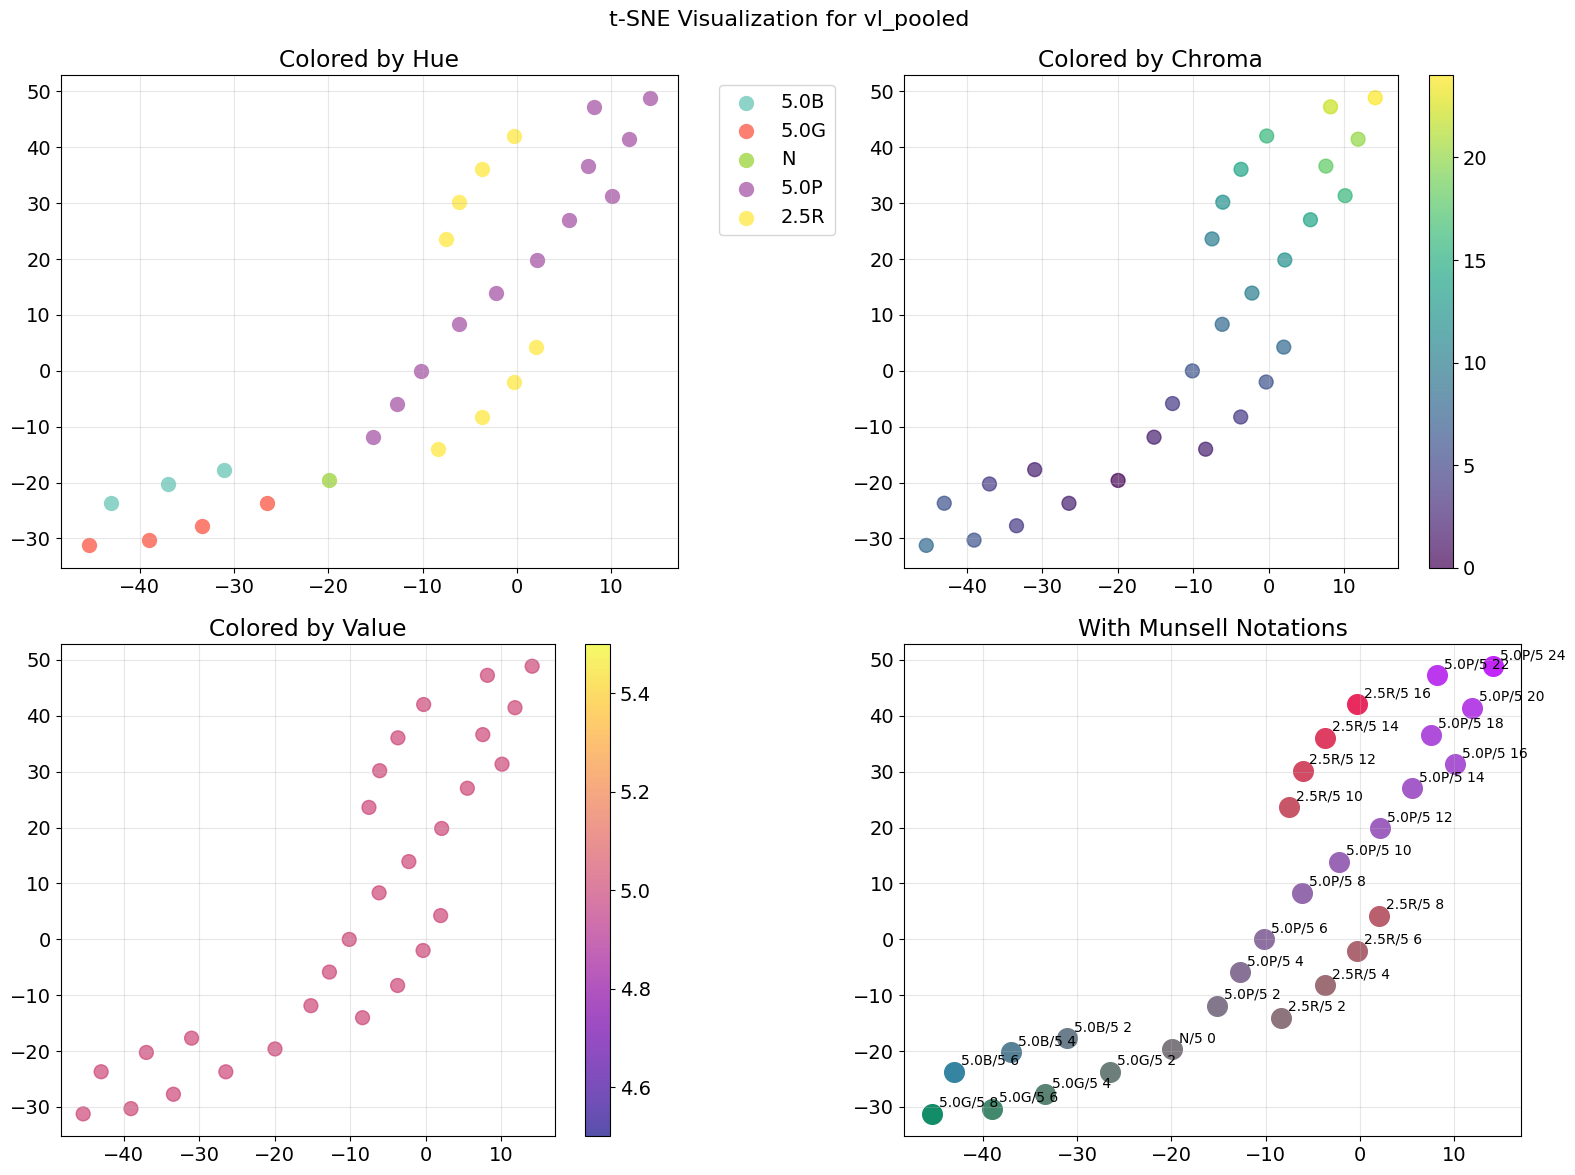

In [7]:
tsne_result = analyzer.tsne(
    variables=['c', 'c', 'c', 'c', 'c', 'v'],
    values=[None, None, None, None, [0, 1]],
    fixed_h=['5G', '2.5R', '5B', '5P', '5Y', '2.5R'],
    fixed_c=[None, None, None, None, None, 0],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5,5,5,5,5,None],
    perplexity=7
)
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.000s...
[t-SNE] Computed neighbors for 31 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 46.909715
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.187256
[t-SNE] KL divergence after 5000 iterations: 0.132318
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.000s...
[t-SNE] Computed neighbors for 31 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 4.236662
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.017990
[t-SNE] KL divergence after 2100 iterations: 0.212667


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:263: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


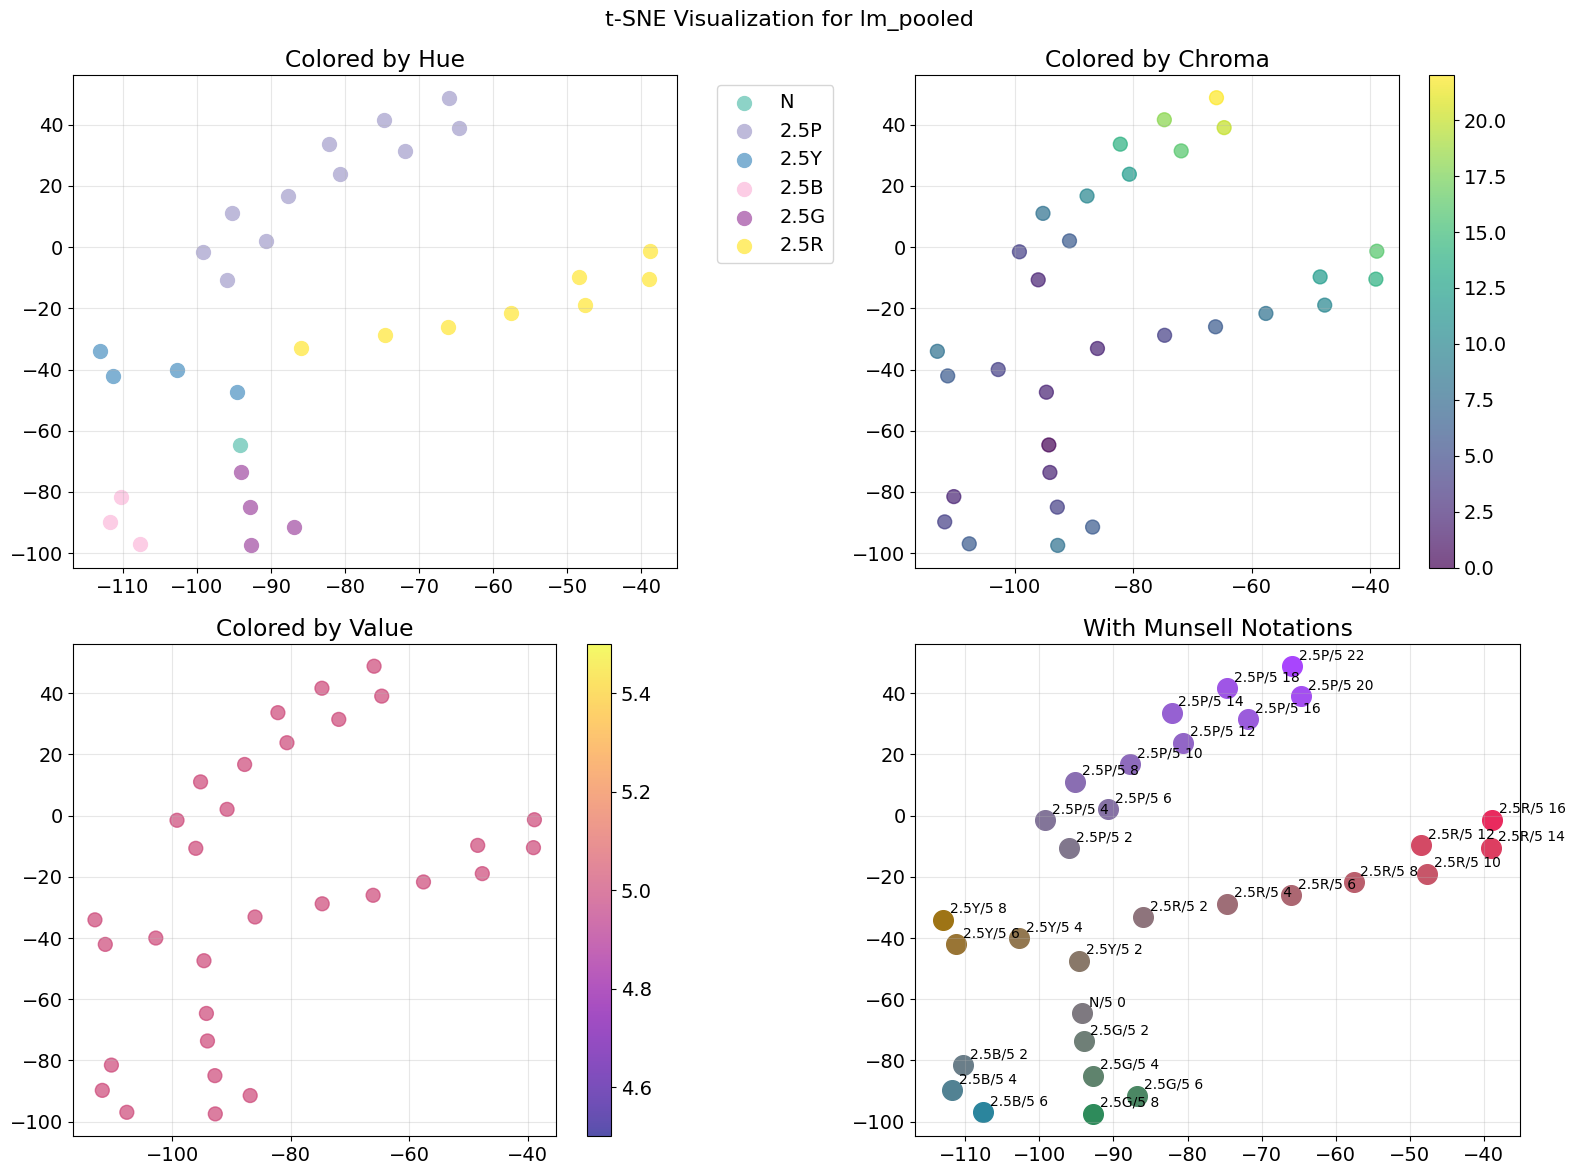

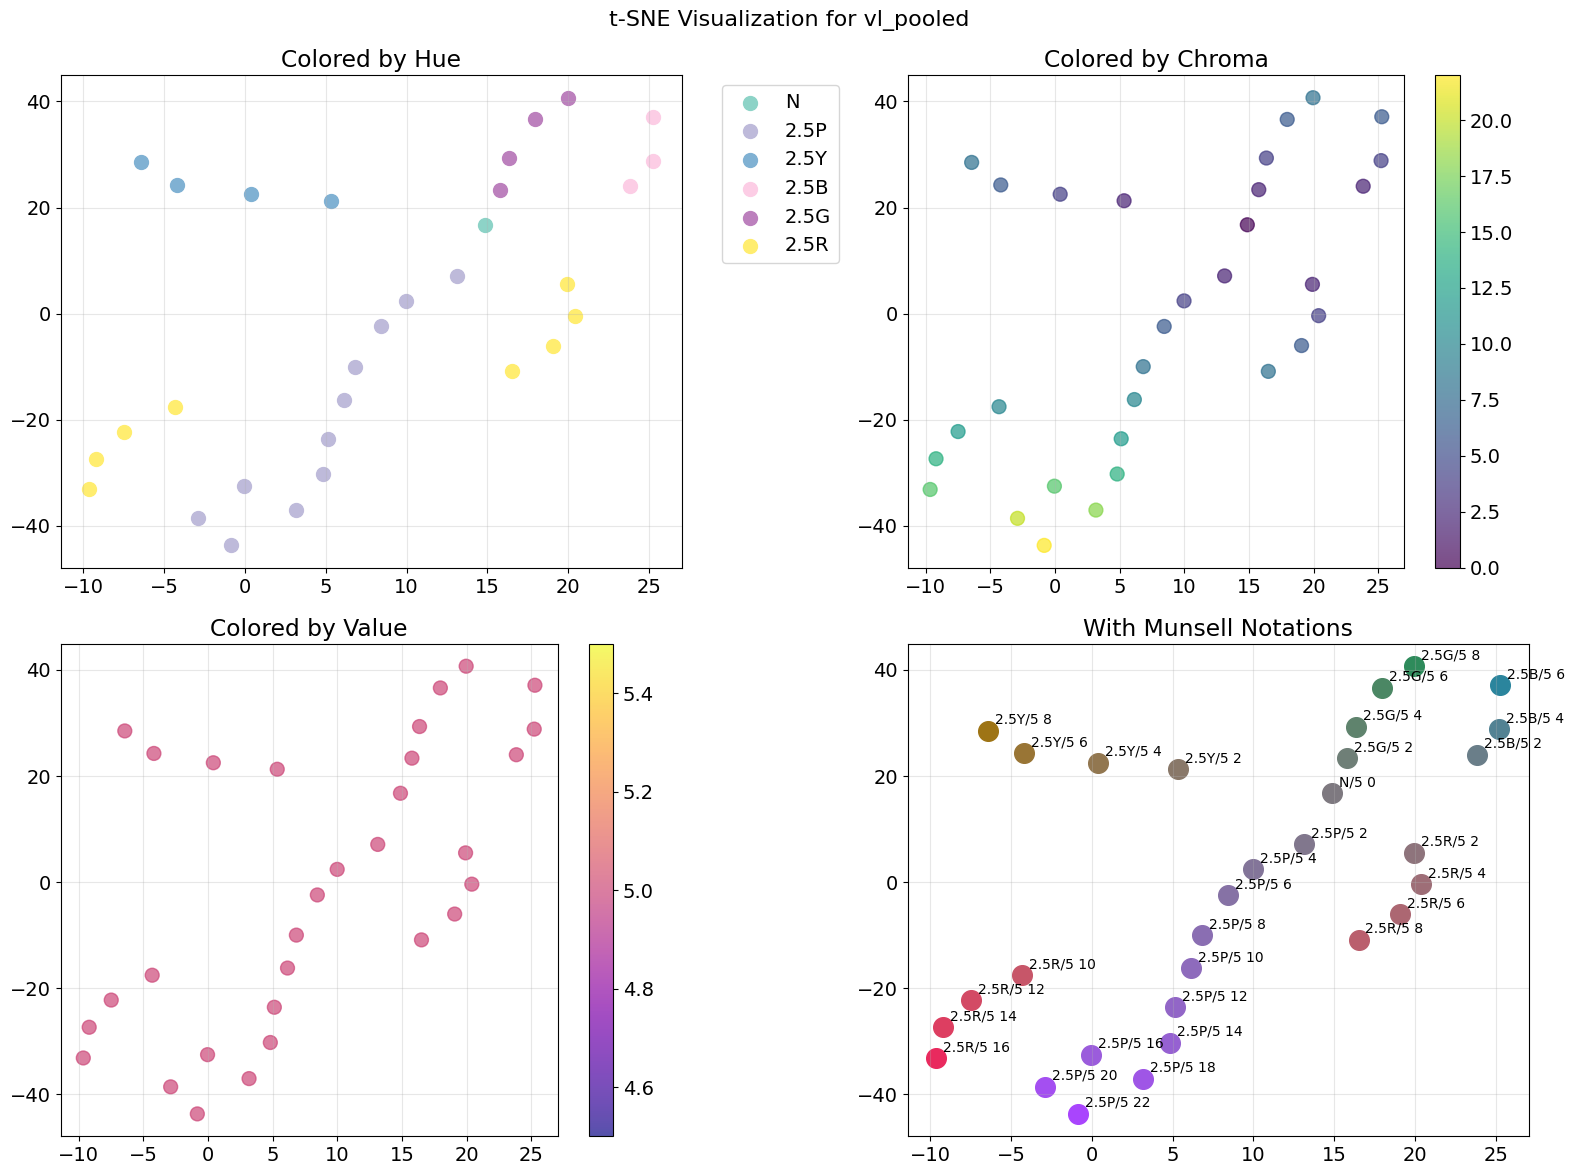

In [6]:
tsne_result = analyzer.tsne(
    variables=['c'] * 6,
    values=[None, None, None, None, None, [0]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B', '2.5P'],
    fixed_c=[None, None, None, None, None, None],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5,5,5,5,5,0],
    perplexity=7
)
analyzer.plot_tsne_results(tsne_result, 'lm_pooled')
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')

[{'munsell_color': H=2.5Y, C=0, V=5, 'xyY': (0.31, 0.316, 19.7), 'RGB': (0.49253392500669396, 0.47538329584345734, 0.5032105352401055), 'H': '2.5Y', 'C': 0, 'V': 5, 'csv_index': 368, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=2, V=5, 'xyY': (0.338, 0.342, 19.2), 'RGB': (0.5170909286207869, 0.46581854950244356, 0.4382753231635602), 'H': '2.5Y', 'C': 2, 'V': 5, 'csv_index': 369, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=4, V=5, 'xyY': (0.374, 0.376, 18.3), 'RGB': (0.5350216479674176, 0.45161224381087145, 0.351568363698517), 'H': '2.5Y', 'C': 4, 'V': 5, 'csv_index': 370, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=6, V=5, 'xyY': (0.423, 0.415, 17.3), 'RGB': (0.5581106127538137, 0.432071872273621, 0.23722723688091657), 'H': '2.5Y', 'C': 6, 'V': 5, 'csv_index': 371, 'has_embedding': True}, {'munsell_color': H=2.5Y, C=8, V=5, 'xyY': (0.462, 0.446, 16.6), 'RGB': (0.5703135591228902, 0.41848860314675995, 0.1115391984676414), 'H': '2.5Y', 'C': 8, 'V': 5, 'csv_index': 

/Users/georgij/Documents/Работа/Color-MMLs/venv/lib/python3.10/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
/Users/georgij/Documents/Работа/Color-MMLs/venv/lib/python3.10/site-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'All points on CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

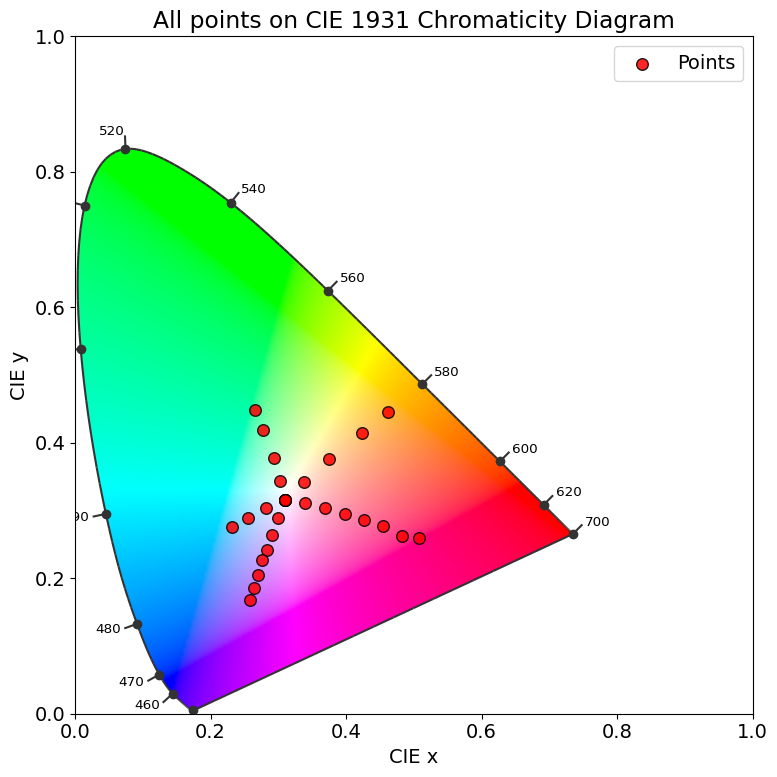

In [31]:
analyzer.plot_chromaticity_diagram(
        variables=['c'] * 5,
    values=[[0,2,4,6,8], [0,2,4,6,8], [0,2,4,6,8,10,12,14], [0, 2,4,6,8,10,12,14], [0, 2,4,6]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B'],
    fixed_c=[None] * 5,      # <-- fixed chroma for the first, None for the second
    fixed_v=[5] * 5,
)

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.000s...
[t-SNE] Computed neighbors for 26 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 44.581573
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.812065
[t-SNE] KL divergence after 1700 iterations: 0.115660
[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.000s...
[t-SNE] Computed neighbors for 26 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 3.957835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.725487
[t-SNE] KL divergence after 5000 iterations: 0.176708


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:263: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


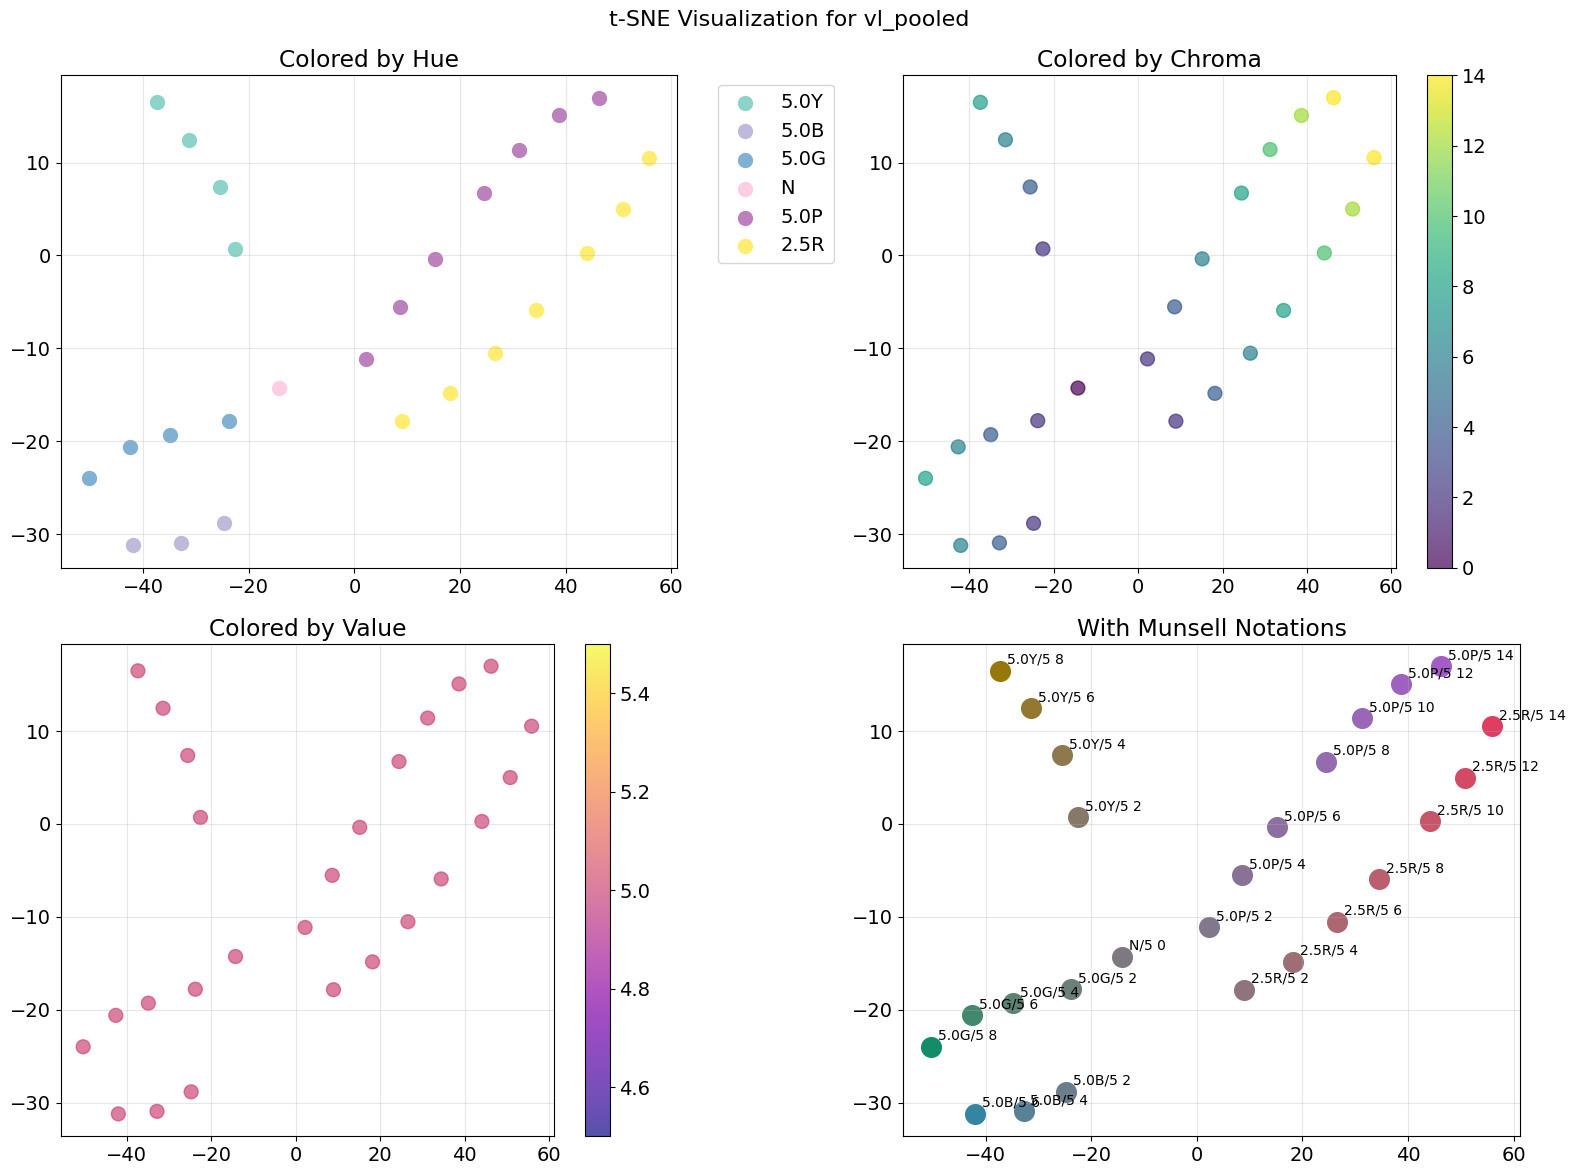

In [8]:
tsne_result = analyzer.tsne(    
    variables=['c'] * 5,
    values=[[0,2,4,6,8], [0,2,4,6,8], [0,2,4,6,8,10,12,14], [0, 2,4,6,8,10,12,14], [0, 2,4,6]],
    fixed_h=['5Y', '5G', '2.5R', '5P', '5B'],
    fixed_c=[None] * 5,      # <-- fixed chroma for the first, None for the second
    fixed_v=[5] * 5,
    perplexity=6)
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 47.086189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.038765
[t-SNE] KL divergence after 2100 iterations: 0.111889
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 4.222459
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.895050
[t-SNE] KL divergence after 2200 iterations: 0.224501


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:263: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


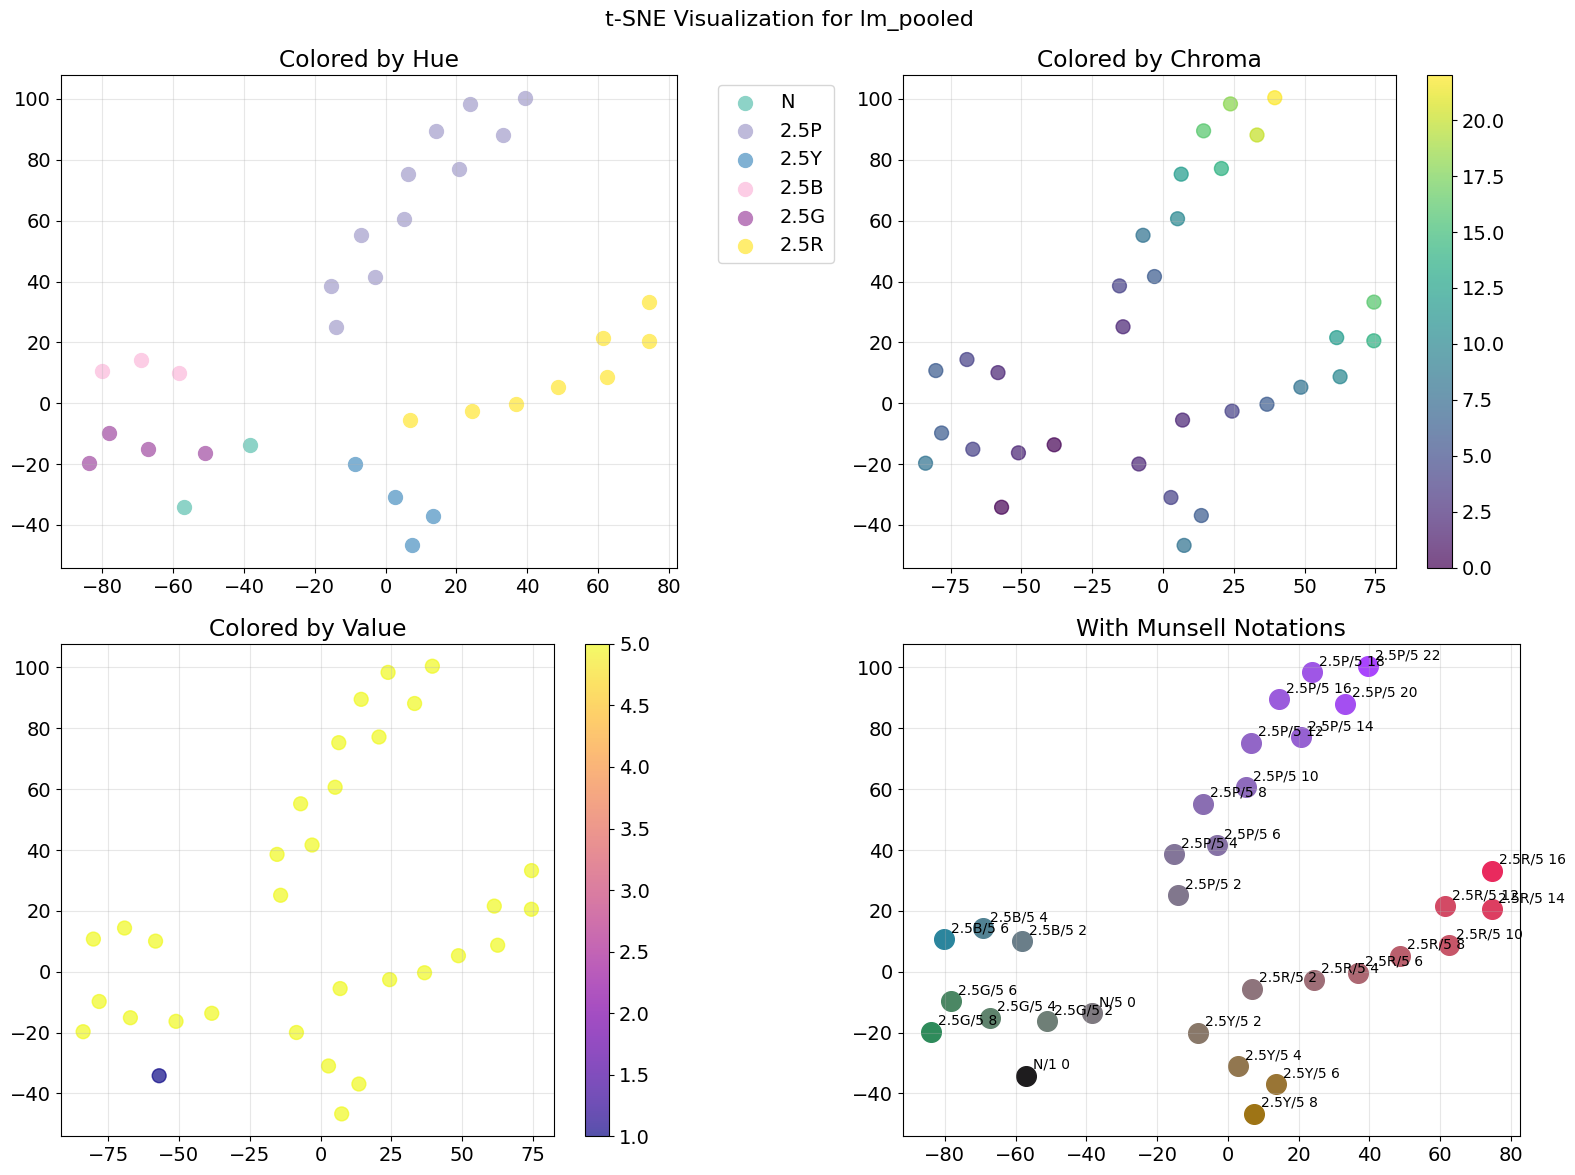

In [9]:
tsne_result = analyzer.tsne(    
    variables=['c', 'c', 'c', 'c', 'c', 'v'],
    values=[None, None, None, None, None, [1]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B', '2.5R'],
    fixed_c=[None, None, None, None, None, 0],      # <-- fixed chroma for the first, None for the second
    fixed_v=[5, 5, 5, 5, 5, None],
    perplexity=7
    )
analyzer.plot_tsne_results(tsne_result, 'lm_pooled')

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 41.208550
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.202469
[t-SNE] KL divergence after 5000 iterations: 0.372859
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 46 samples in 0.000s...
[t-SNE] Computed neighbors for 46 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 46 / 46
[t-SNE] Mean sigma: 3.491771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.810501
[t-SNE] KL divergence after 2300 iterations: 0.271771


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:263: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


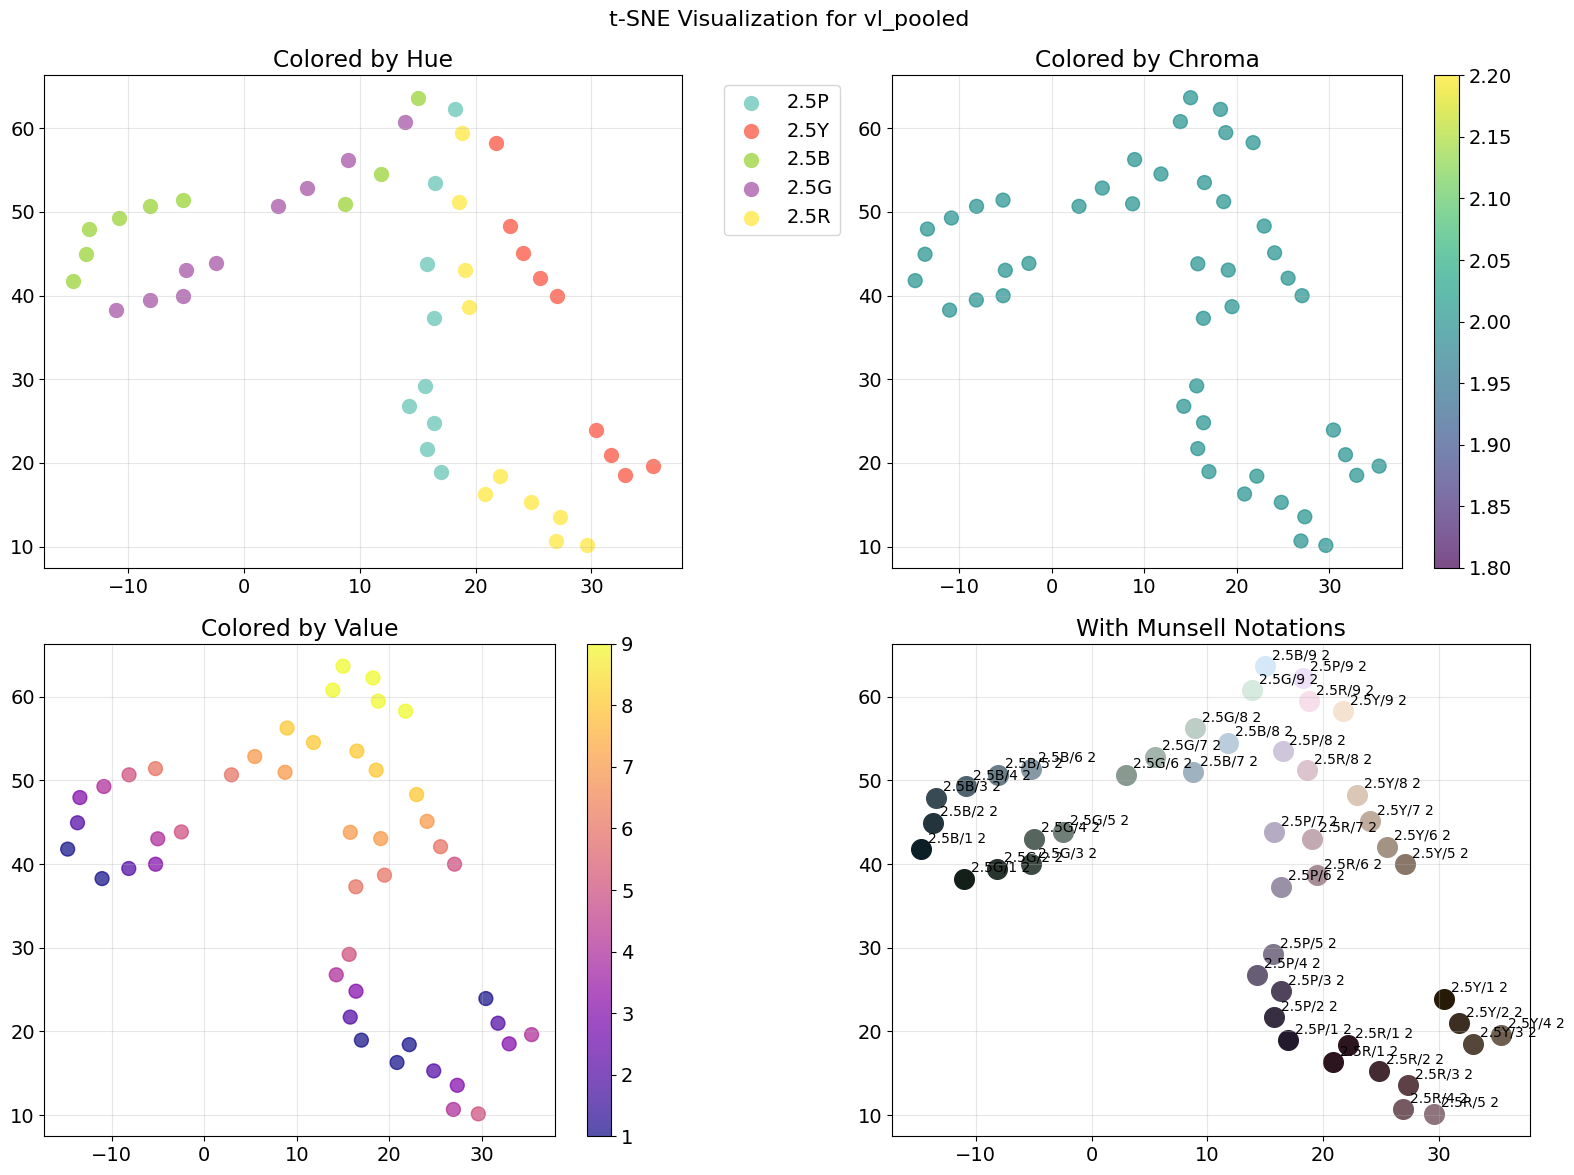

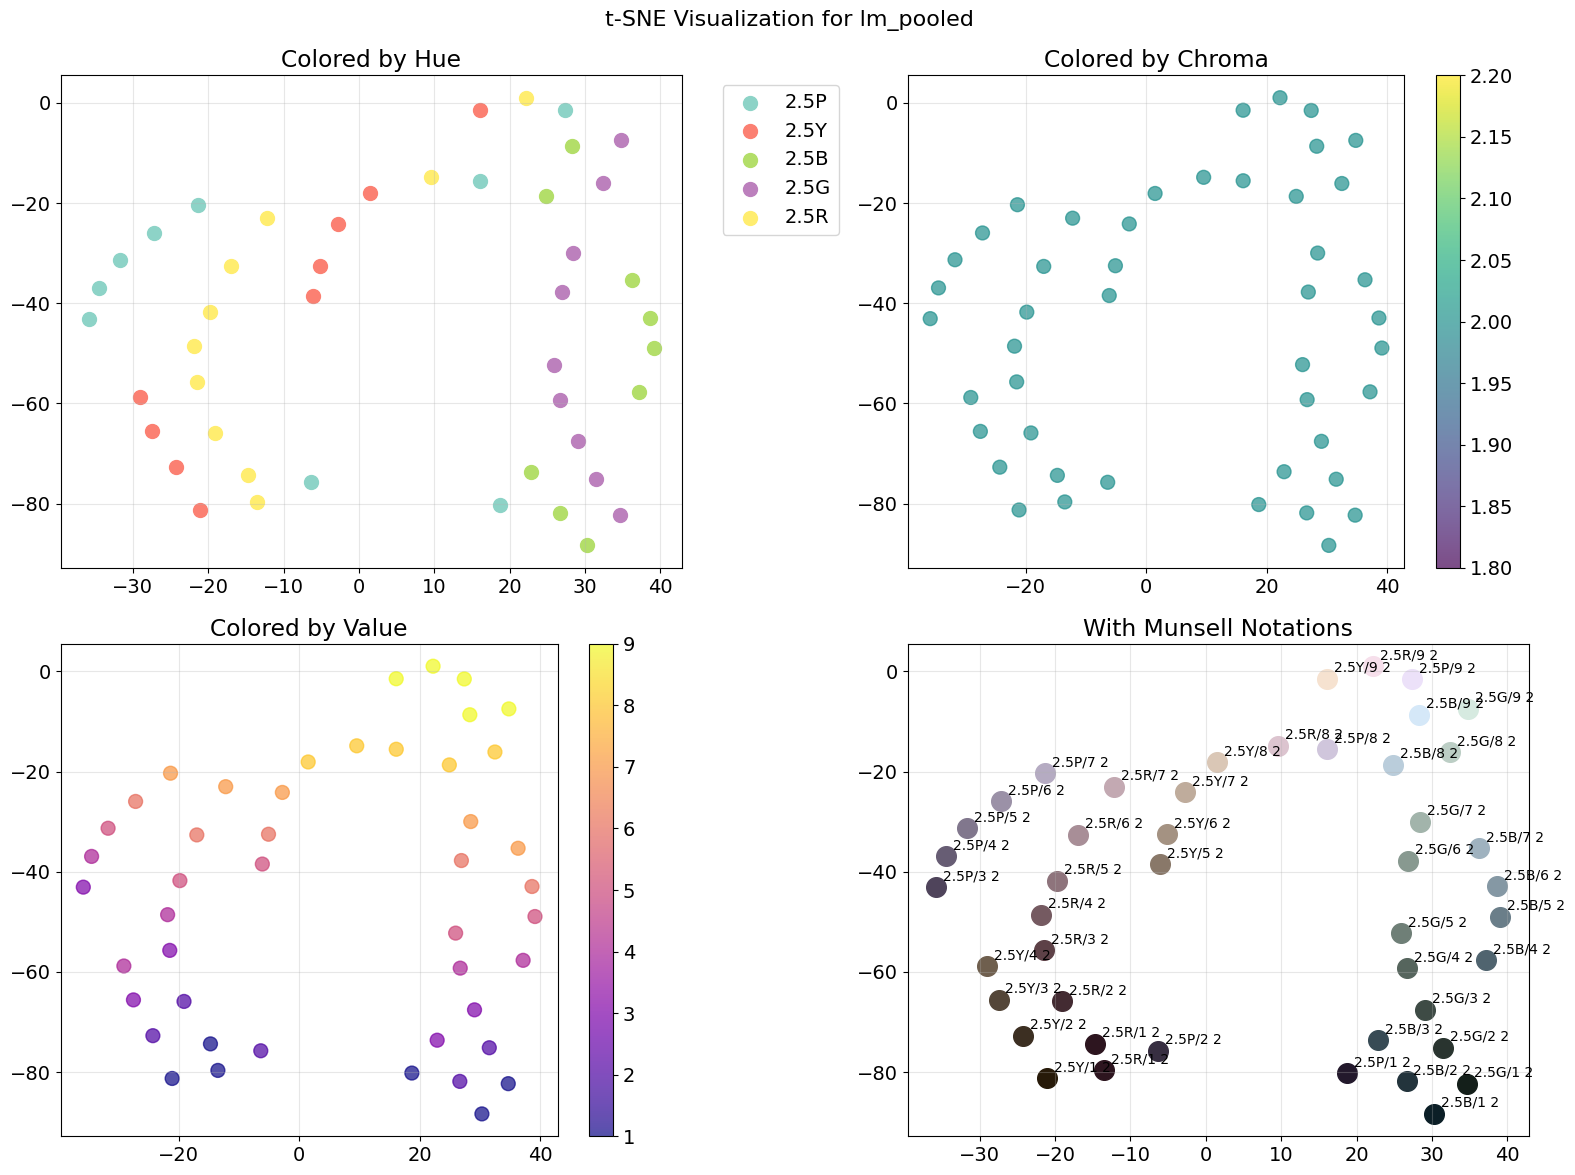

In [10]:
tsne_result = analyzer.tsne(    
    variables=['v', 'v', 'v', 'v', 'v', 'v'],
    values=[None, None, None, None, None, [1]],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B', '2.5R'],
    fixed_c=[2, 2, 2, 2, 2, 2],      # <-- fixed chroma for the first, None for the second
    fixed_v=[None, None, None, None, None, None],
    perplexity=7
    )
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')
analyzer.plot_tsne_results(tsne_result, 'lm_pooled')

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 54.876606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.186142
[t-SNE] KL divergence after 2750 iterations: 0.197288
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 4.163142
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.592365
[t-SNE] KL divergence after 5000 iterations: 0.158576


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:263: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


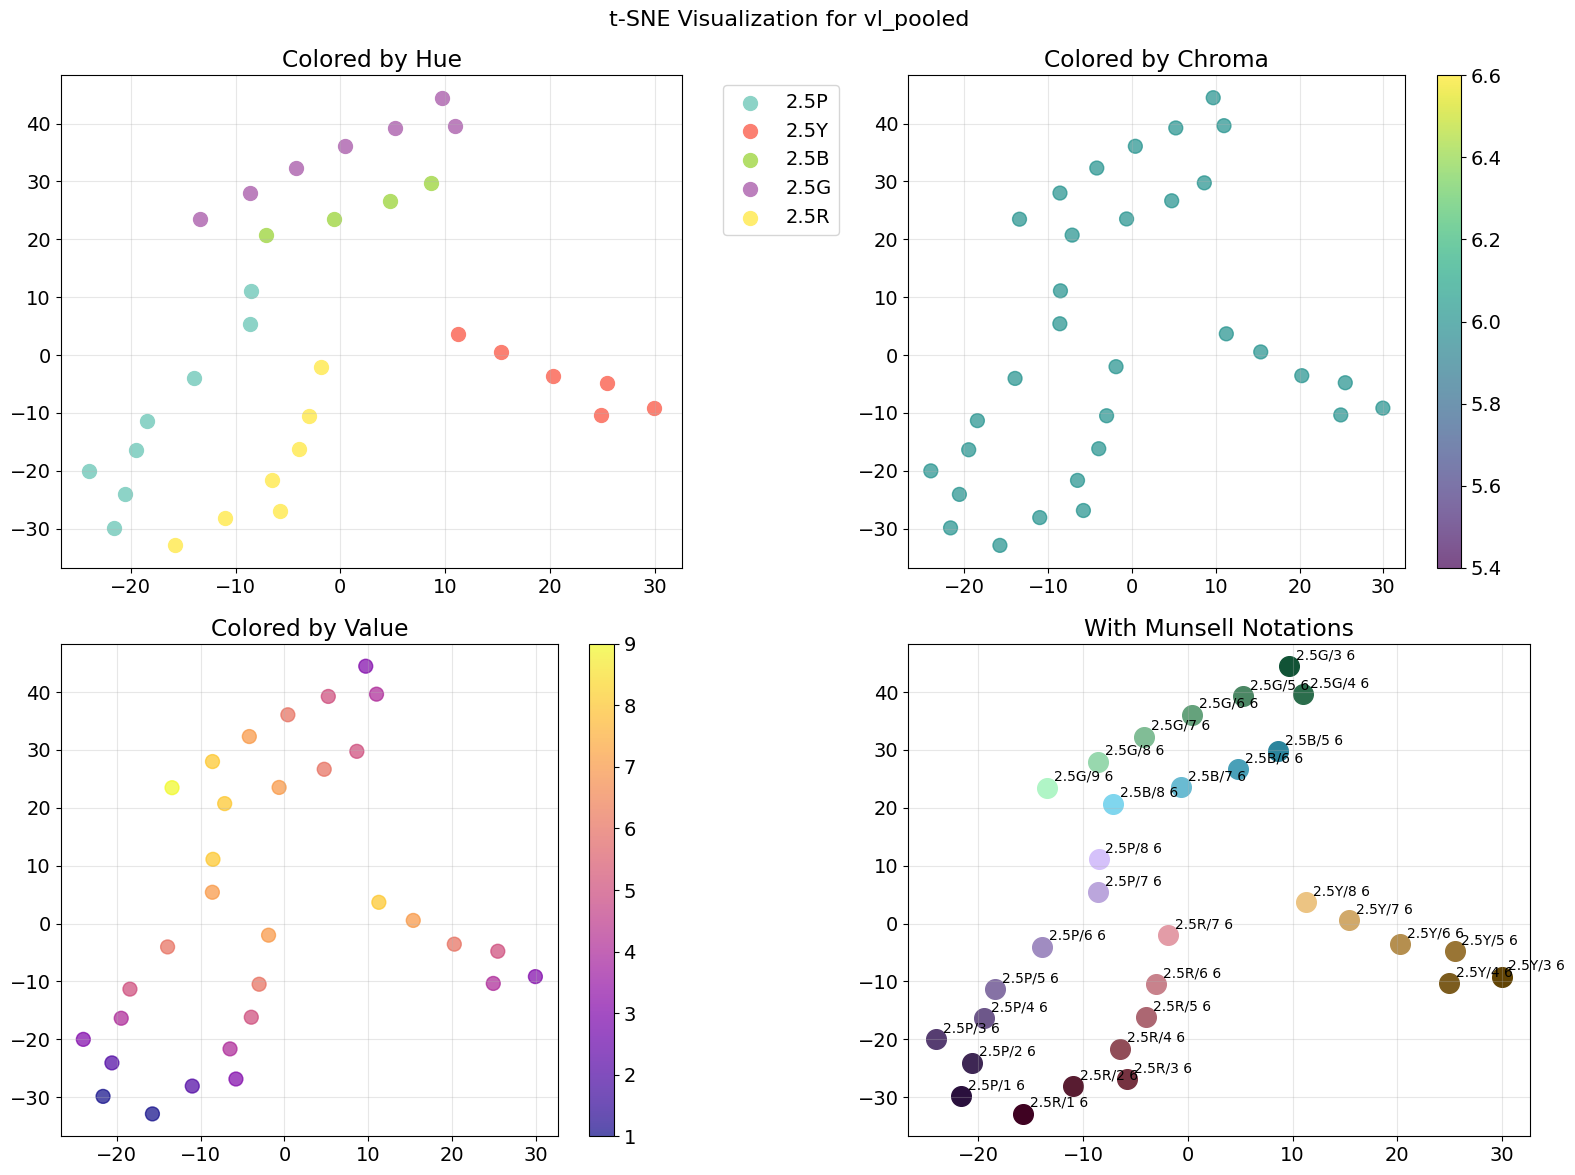

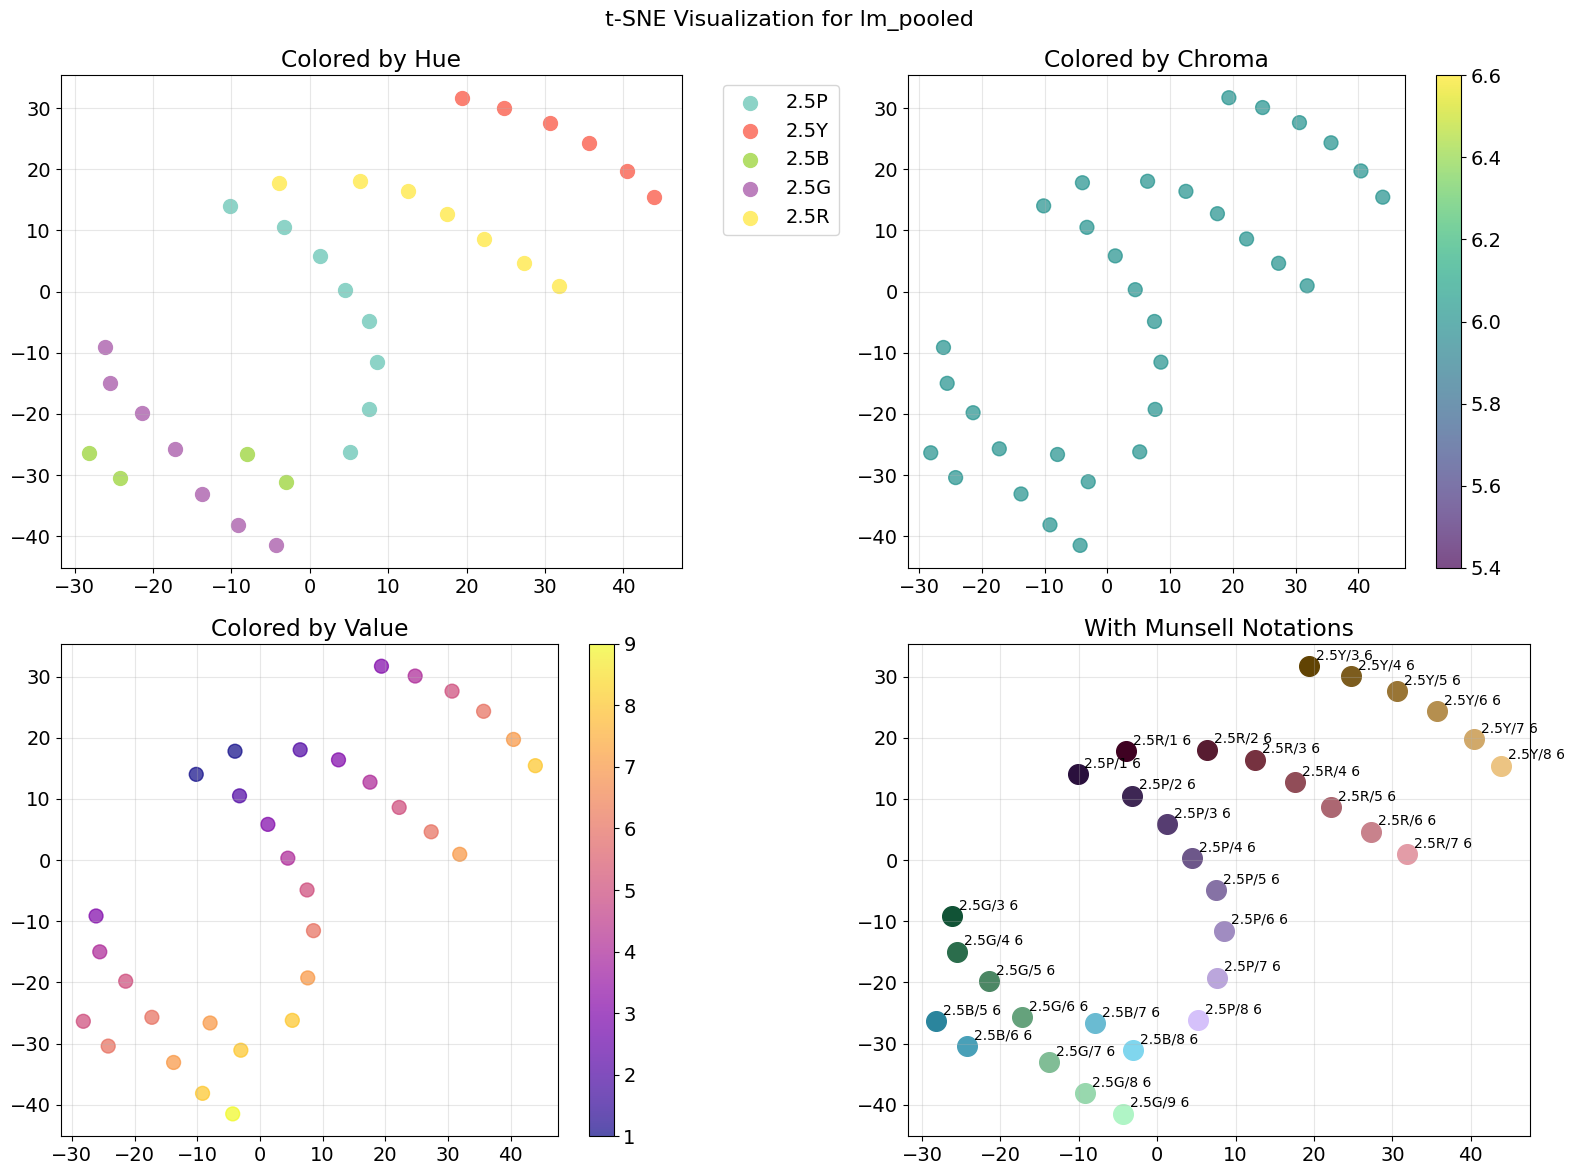

In [11]:
tsne_result = analyzer.tsne(    
    variables=['v', 'v', 'v', 'v', 'v'],
    values=[None, None, None, None, None],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B'],
    fixed_c=[6, 6, 6, 6, 6, 6],      # <-- fixed chroma for the first, None for the second
    fixed_v=[None, None, None, None, None],
    perplexity=7
    )
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')
analyzer.plot_tsne_results(tsne_result, 'lm_pooled')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 48.442856
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.684086
[t-SNE] KL divergence after 2900 iterations: 0.291609
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.000s...
[t-SNE] Computed neighbors for 32 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 3.591738
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.024002
[t-SNE] KL divergence after 2450 iterations: 0.203859


/Users/georgij/Documents/Работа/Color-MMLs/utils/analyze/munsell_analyze.py:263: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1,1].scatter(tsne_result[i, 0], tsne_result[i, 1], c=rgb, s=200)


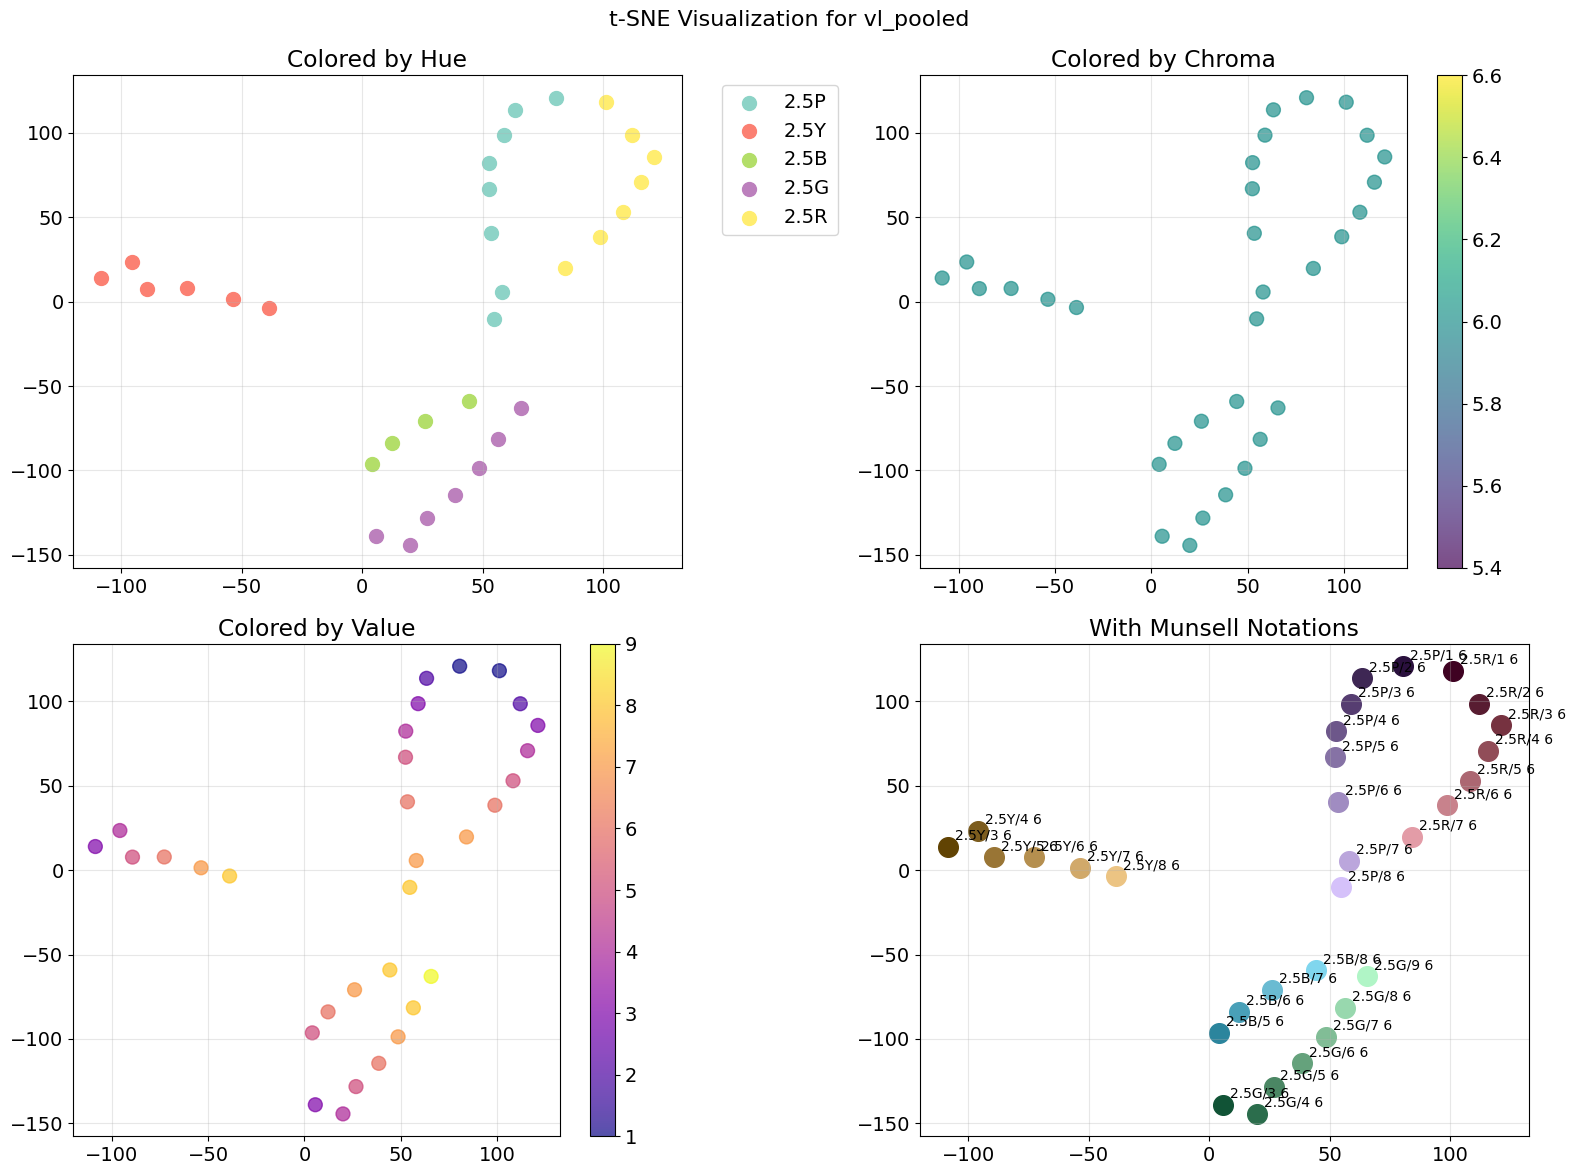

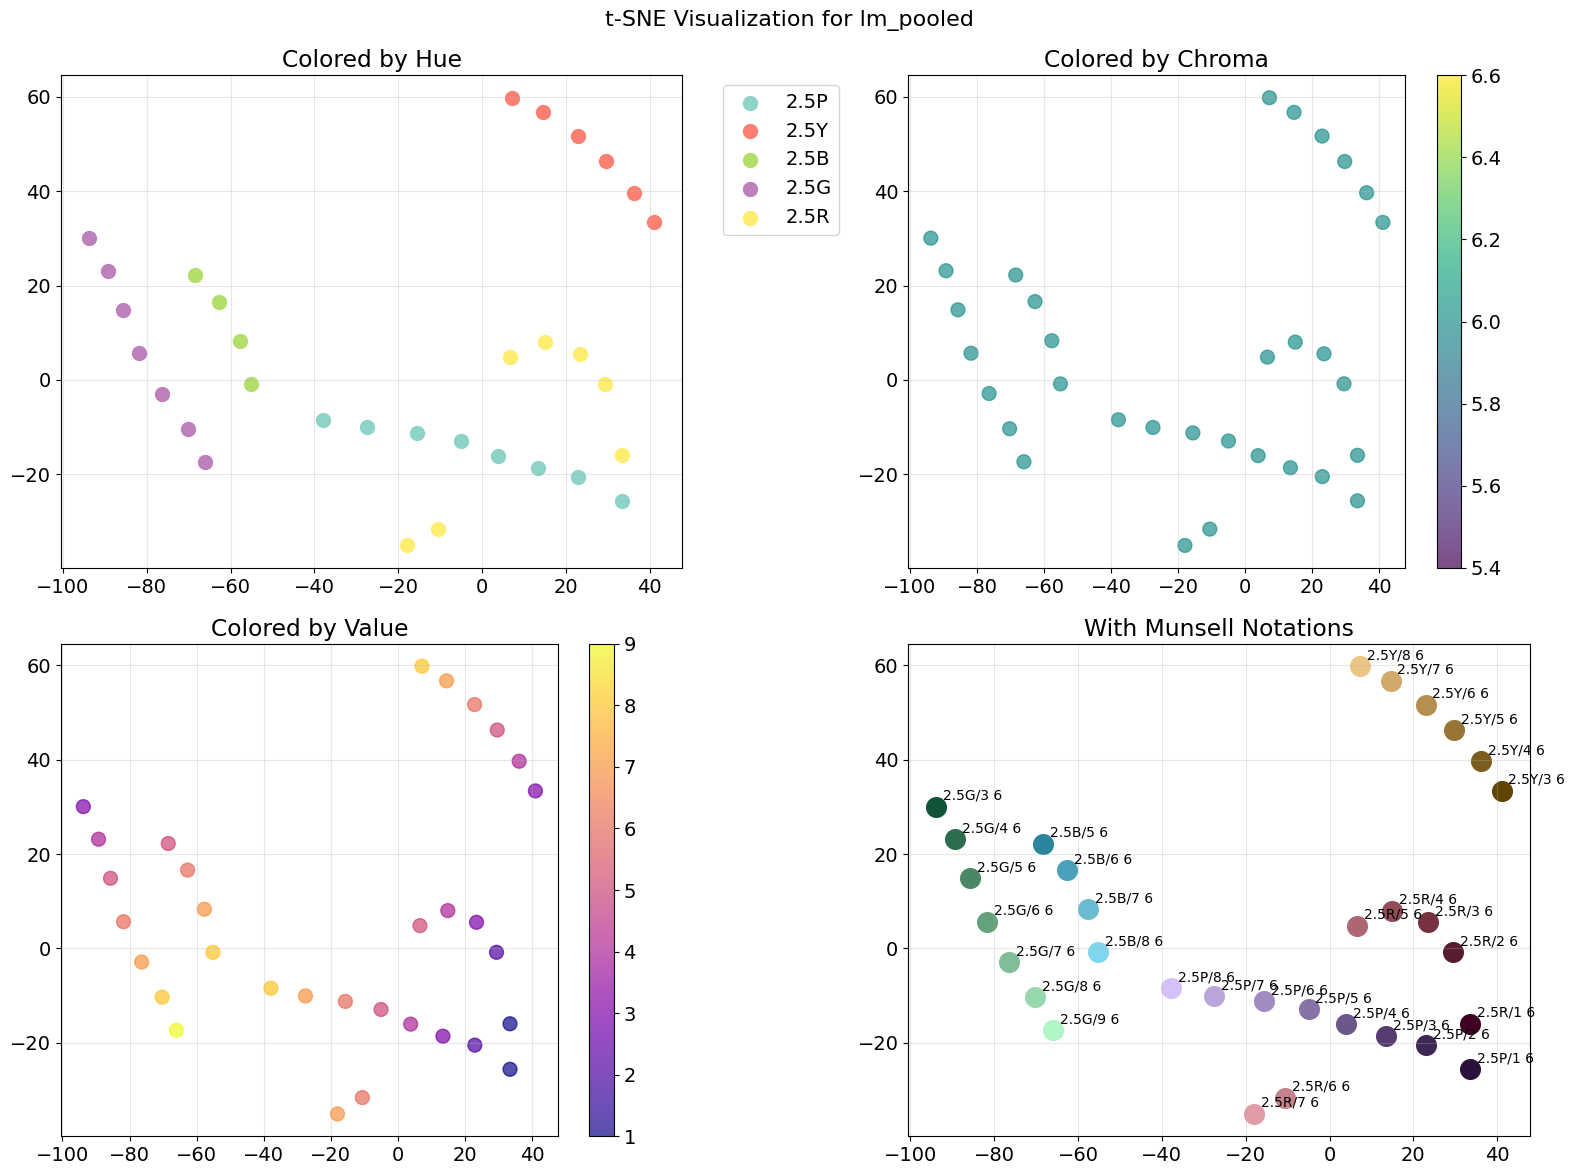

In [12]:
tsne_result = analyzer.tsne(    
    variables=['v', 'v', 'v', 'v', 'v', 'v'],
    values=[None, None, None, None, None],
    fixed_h=['2.5Y', '2.5G', '2.5R', '2.5P', '2.5B'],
    fixed_c=[6, 6, 6, 6, 6, 6],      # <-- fixed chroma for the first, None for the second
    fixed_v=[None, None, None, None, None, None],
    perplexity=5
    )
analyzer.plot_tsne_results(tsne_result, 'vl_pooled')
analyzer.plot_tsne_results(tsne_result, 'lm_pooled')